# **Nihal** **Gadkari**

In [14]:
import numpy as np
import pandas as pd
import os
import calendar
import datetime as dt
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor,RandomForestRegressor,RandomForestClassifier,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
import xgboost
from sklearn.metrics import accuracy_score,classification_report,f1_score,recall_score,precision_score,mean_absolute_error,r2_score,mean_squared_error,silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [15]:
dfun= pd.read_csv('/content/unemployment in india.csv')
dfun

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
763             NaN          NaN        NaN                               NaN   
764             NaN          NaN        NaN                               NaN   
765             NaN          NaN        NaN                               NaN   
766             NaN          NaN        NaN                               NaN   
767             NaN          NaN        NaN                               NaN   

      Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0             11999139.0                                     43.24  Rural  
1             11755881.0                                     42.05  Rural  
2             12086707.0                                     43.50  Rural  
3             12285693.0                                     43.97  Rural  
4             12256762.0                                     44.68  Rural  
..                   ...                                       ...    ...  
763                  NaN                                       NaN    NaN  
764                  NaN                                       NaN    NaN  
765                  NaN                                       NaN    NaN  
766                  NaN                                       NaN    NaN  
767                  NaN                                       NaN    NaN  

[768 rows x 7 columns]

In [16]:
dfun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [17]:
dfun.shape

(768, 7)

In [18]:
for i in dfun.columns:
    print('-------------------------')
    print(dfun[i].value_counts())

-------------------------
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64
-------------------------
 31-10-2019    55
 30-11-2019    55
 31-05-2019    54
 30-06-2019    54
 31-07-2019    54
 31-08-2019    53
 31-12-2019    53
 31-01-2020    53
 29-02-2020    53
 30-09-2019    52
 31-03-2020    52
 30-04-2020    51
 31-05-2020    51
 30-06-2020    50
Name:  Date, dtype: int64

In [19]:
dfun.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [20]:
dfun['Region'].value_counts()

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64

In [21]:
dfun[' Date'].value_counts()

 31-10-2019    55
 30-11-2019    55
 31-05-2019    54
 30-06-2019    54
 31-07-2019    54
 31-08-2019    53
 31-12-2019    53
 31-01-2020    53
 29-02-2020    53
 30-09-2019    52
 31-03-2020    52
 30-04-2020    51
 31-05-2020    51
 30-06-2020    50
Name:  Date, dtype: int64

In [22]:
dfun[' Frequency'].value_counts()

Monthly     381
 Monthly    359
Name:  Frequency, dtype: int64

In [23]:
dfun['Area'].value_counts()

Urban    381
Rural    359
Name: Area, dtype: int64

In [24]:
last_records = dfun.tail(15)
last_records

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
753  West Bengal   30-06-2020    Monthly                              9.86   
754          NaN          NaN        NaN                               NaN   
755          NaN          NaN        NaN                               NaN   
756          NaN          NaN        NaN                               NaN   
757          NaN          NaN        NaN                               NaN   
758          NaN          NaN        NaN                               NaN   
759          NaN          NaN        NaN                               NaN   
760          NaN          NaN        NaN                               NaN   
761          NaN          NaN        NaN                               NaN   
762          NaN          NaN        NaN                               NaN   
763          NaN          NaN        NaN                               NaN   
764          NaN          NaN        NaN                               NaN   
765          NaN          NaN        NaN                               NaN   
766          NaN          NaN        NaN                               NaN   
767          NaN          NaN        NaN                               NaN   

      Estimated Employed   Estimated Labour Participation Rate (%)   Area  
753            9088931.0                                     37.57  Urban  
754                  NaN                                       NaN    NaN  
755                  NaN                                       NaN    NaN  
756                  NaN                                       NaN    NaN  
757                  NaN                                       NaN    NaN  
758                  NaN                                       NaN    NaN  
759                  NaN                                       NaN    NaN  
760                  NaN                                       NaN    NaN  
761                  NaN                                       NaN    NaN  
762                  NaN                                       NaN    NaN  
763                  NaN                                       NaN    NaN  
764                  NaN                                       NaN    NaN  
765                  NaN                                       NaN    NaN  
766                  NaN                                       NaN    NaN  
767                  NaN                                       NaN    NaN

In [25]:
df_droped_lastrecords_null_values  = dfun.drop(dfun.tail(14).index)
df_droped_lastrecords_null_values

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
749     West Bengal   29-02-2020    Monthly                              7.55   
750     West Bengal   31-03-2020    Monthly                              6.67   
751     West Bengal   30-04-2020    Monthly                             15.63   
752     West Bengal   31-05-2020    Monthly                             15.22   
753     West Bengal   30-06-2020    Monthly                              9.86   

      Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0             11999139.0                                     43.24  Rural  
1             11755881.0                                     42.05  Rural  
2             12086707.0                                     43.50  Rural  
3             12285693.0                                     43.97  Rural  
4             12256762.0                                     44.68  Rural  
..                   ...                                       ...    ...  
749           10871168.0                                     44.09  Urban  
750           10806105.0                                     43.34  Urban  
751            9299466.0                                     41.20  Urban  
752            9240903.0                                     40.67  Urban  
753            9088931.0                                     37.57  Urban  

[754 rows x 7 columns]

In [26]:
rows_with_null= df_droped_lastrecords_null_values[df_droped_lastrecords_null_values.isnull().any(axis=1)]
rows_with_null

Region  Date  Frequency   Estimated Unemployment Rate (%)  \
359    NaN   NaN        NaN                               NaN   
360    NaN   NaN        NaN                               NaN   
361    NaN   NaN        NaN                               NaN   
362    NaN   NaN        NaN                               NaN   
363    NaN   NaN        NaN                               NaN   
364    NaN   NaN        NaN                               NaN   
365    NaN   NaN        NaN                               NaN   
366    NaN   NaN        NaN                               NaN   
367    NaN   NaN        NaN                               NaN   
368    NaN   NaN        NaN                               NaN   
369    NaN   NaN        NaN                               NaN   
370    NaN   NaN        NaN                               NaN   
371    NaN   NaN        NaN                               NaN   
372    NaN   NaN        NaN                               NaN   

      Estimated Employed   Estimated Labour Participation Rate (%) Area  
359                  NaN                                       NaN  NaN  
360                  NaN                                       NaN  NaN  
361                  NaN                                       NaN  NaN  
362                  NaN                                       NaN  NaN  
363                  NaN                                       NaN  NaN  
364                  NaN                                       NaN  NaN  
365                  NaN                                       NaN  NaN  
366                  NaN                                       NaN  NaN  
367                  NaN                                       NaN  NaN  
368                  NaN                                       NaN  NaN  
369                  NaN                                       NaN  NaN  
370                  NaN                                       NaN  NaN  
371                  NaN                                       NaN  NaN  
372                  NaN                                       NaN  NaN

In [27]:
df_cl = df_droped_lastrecords_null_values.dropna()
df_cl

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
749     West Bengal   29-02-2020    Monthly                              7.55   
750     West Bengal   31-03-2020    Monthly                              6.67   
751     West Bengal   30-04-2020    Monthly                             15.63   
752     West Bengal   31-05-2020    Monthly                             15.22   
753     West Bengal   30-06-2020    Monthly                              9.86   

      Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0             11999139.0                                     43.24  Rural  
1             11755881.0                                     42.05  Rural  
2             12086707.0                                     43.50  Rural  
3             12285693.0                                     43.97  Rural  
4             12256762.0                                     44.68  Rural  
..                   ...                                       ...    ...  
749           10871168.0                                     44.09  Urban  
750           10806105.0                                     43.34  Urban  
751            9299466.0                                     41.20  Urban  
752            9240903.0                                     40.67  Urban  
753            9088931.0                                     37.57  Urban  

[740 rows x 7 columns]

In [28]:
df_cl.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [29]:
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [30]:
for i in df_cl.columns:
    print(df_cl[i].value_counts())

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64
 31-10-2019    55
 30-11-2019    55
 31-05-2019    54
 30-06-2019    54
 31-07-2019    54
 31-08-2019    53
 31-12-2019    53
 31-01-2020    53
 29-02-2020    53
 30-09-2019    52
 31-03-2020    52
 30-04-2020    51
 31-05-2020    51
 30-06-2020    50
Name:  Date, dtype: int64
Monthly     381
 Monthly    359
Name:  Frequency, d

In [31]:
columns_mapping = {
    'Region': 'Region',
    ' Date': 'Date',
    ' Frequency': 'Frequency',
    ' Estimated Unemployment Rate (%)': 'Estimated_Unemployment_Rate_(%)',
    ' Estimated Employed': 'Estimated_Employed',
    ' Estimated Labour Participation Rate (%)': 'Estimated_Labour_Participation_Rate_(%)',
    ' Area': 'Area'
}
df_cl.rename(columns=columns_mapping, inplace=True)
df_cl.columns

Index(['Region', 'Date', 'Frequency', 'Estimated_Unemployment_Rate_(%)',
       'Estimated_Employed', 'Estimated_Labour_Participation_Rate_(%)',
       'Area'],
      dtype='object')

In [32]:
data_types = {
    'Region': str,
    'Date': 'datetime64',
    'Frequency': str,
    'Estimated_Unemployment_Rate_(%)': float,
    'Estimated_Employed': float,
    'Estimated_Labour_Participation_Rate_(%)': float,
    'Area': str
}
df_cl = df_cl.astype(data_types)
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated_Unemployment_Rate_(%)          740 non-null    float64       
 4   Estimated_Employed                       740 non-null    float64       
 5   Estimated_Labour_Participation_Rate_(%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


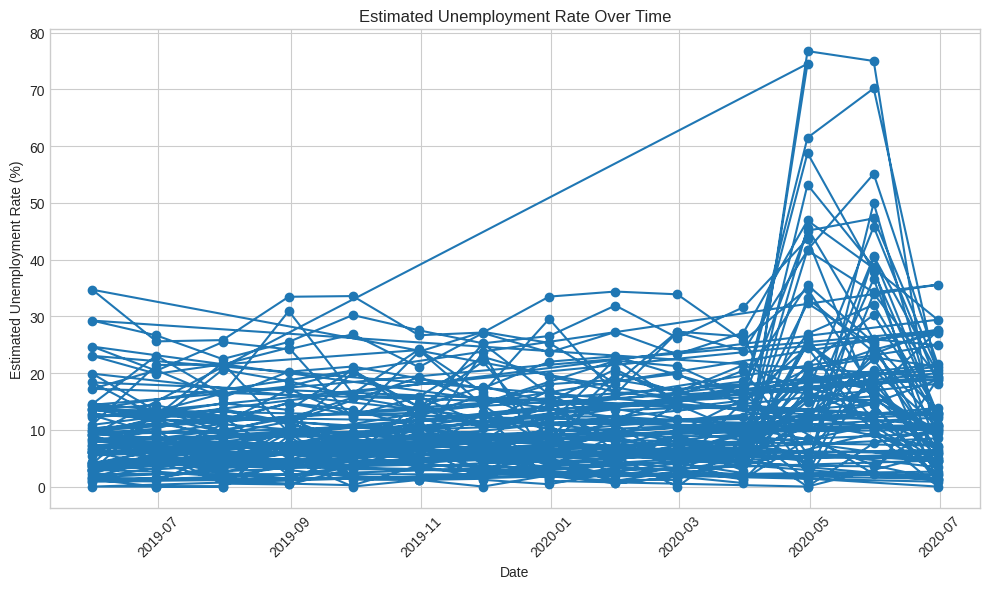

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(df_cl['Date'], df_cl['Estimated_Unemployment_Rate_(%)'], marker='o')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Estimated Unemployment Rate Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

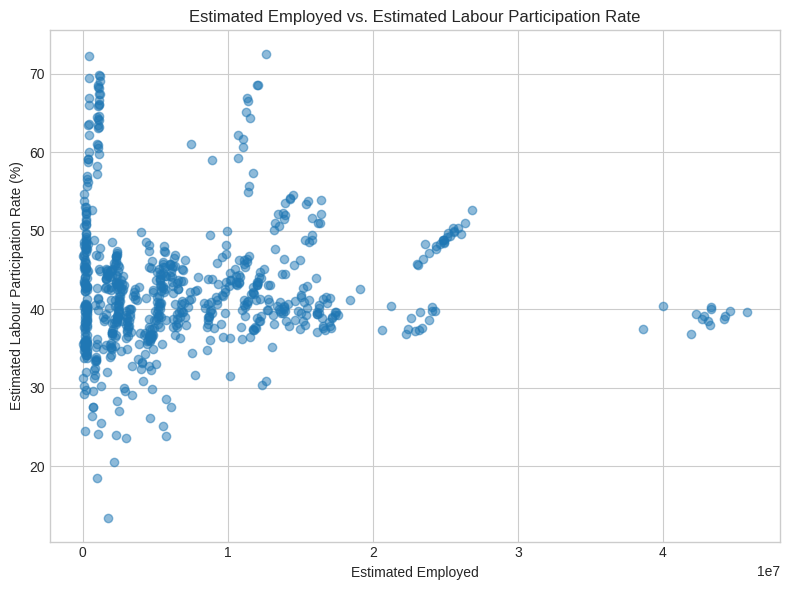

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(df_cl['Estimated_Employed'], df_cl['Estimated_Labour_Participation_Rate_(%)'], alpha=0.5)
plt.xlabel('Estimated Employed')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.title('Estimated Employed vs. Estimated Labour Participation Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

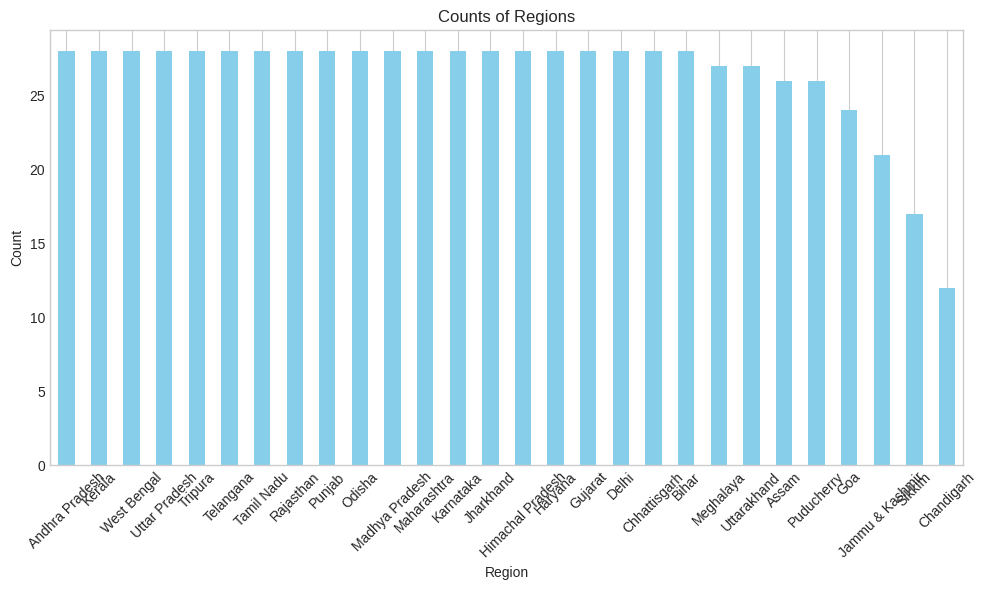

In [35]:
plt.figure(figsize=(10, 6))
region_counts = df_cl['Region'].value_counts()
region_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Counts of Regions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

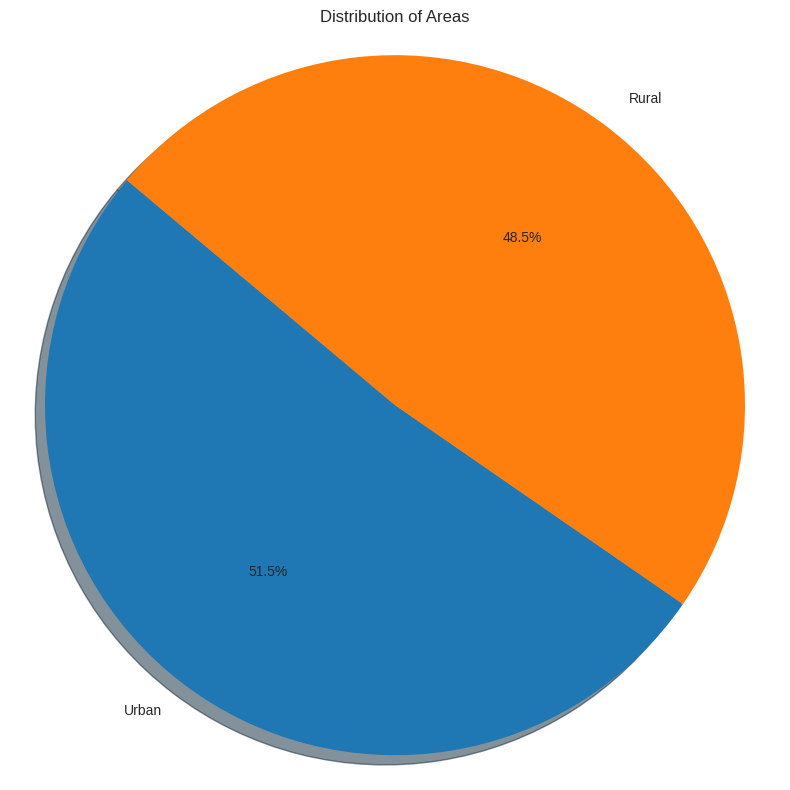

In [36]:
plt.figure(figsize=(8, 8))
area_counts = df_cl['Area'].value_counts()
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribution of Areas')
plt.tight_layout()
plt.show()

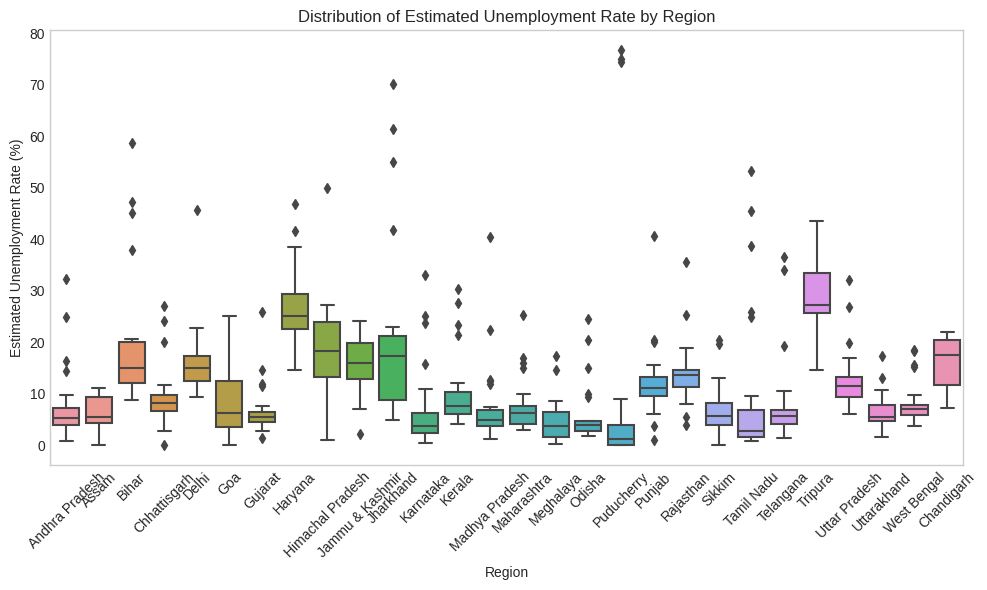

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Estimated_Unemployment_Rate_(%)', data=df_cl)
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Distribution of Estimated Unemployment Rate by Region')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

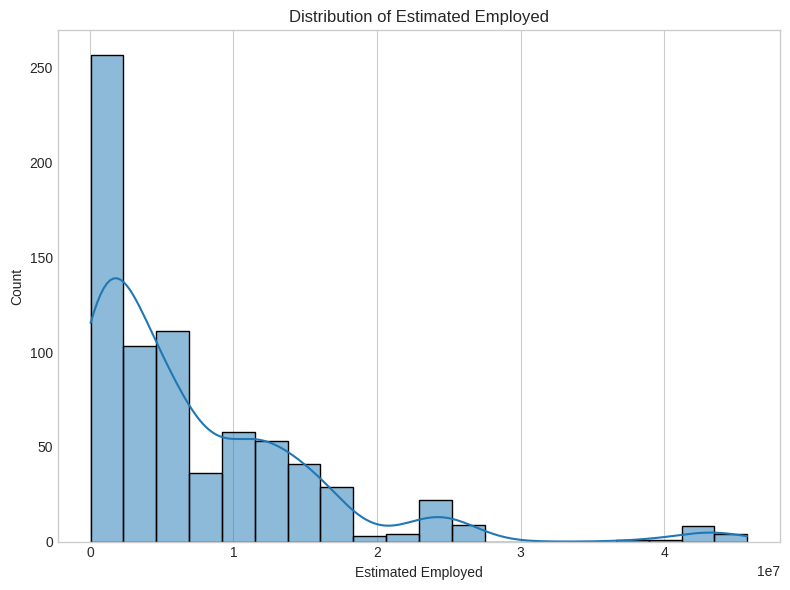

In [38]:
plt.figure(figsize=(8, 6))
sns.histplot(df_cl['Estimated_Employed'], bins=20, kde=True)
plt.xlabel('Estimated Employed')
plt.ylabel('Count')
plt.title('Distribution of Estimated Employed')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

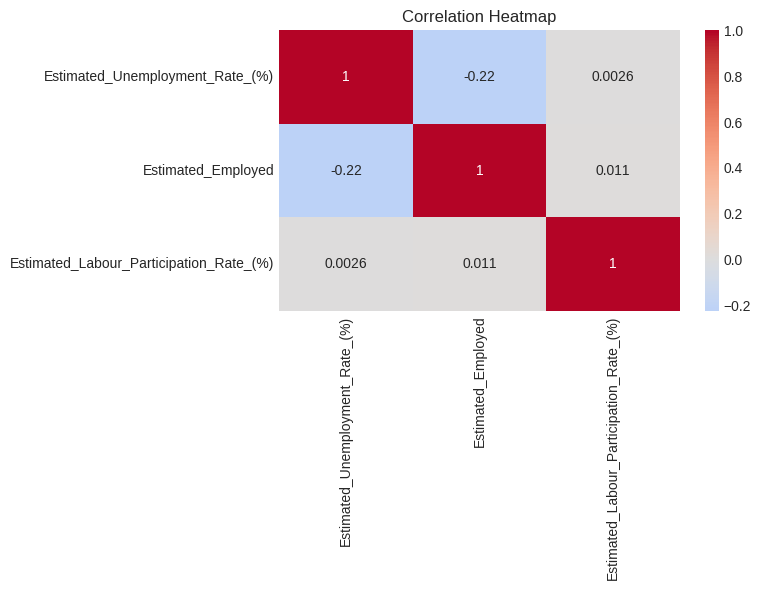

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_cl.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

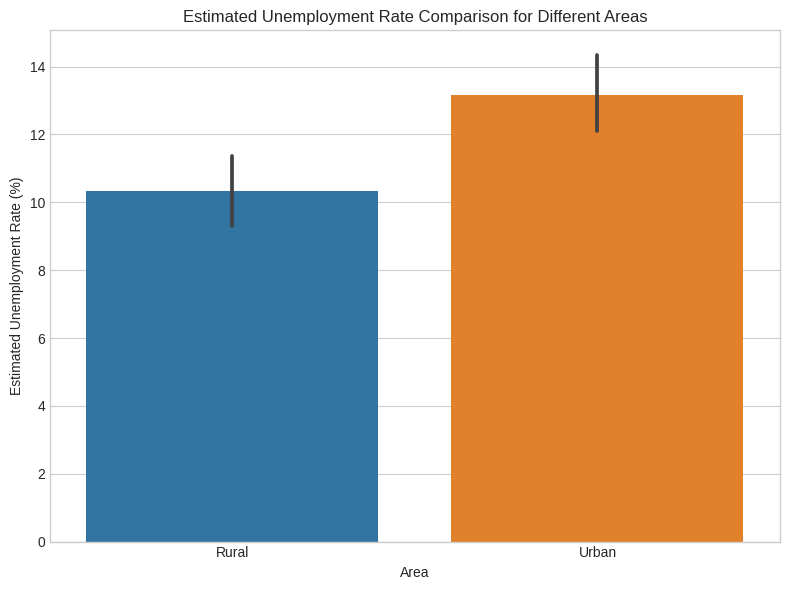

In [40]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Area', y='Estimated_Unemployment_Rate_(%)', data=df_cl)
plt.xlabel('Area')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Estimated Unemployment Rate Comparison for Different Areas')
plt.tight_layout()
plt.show()

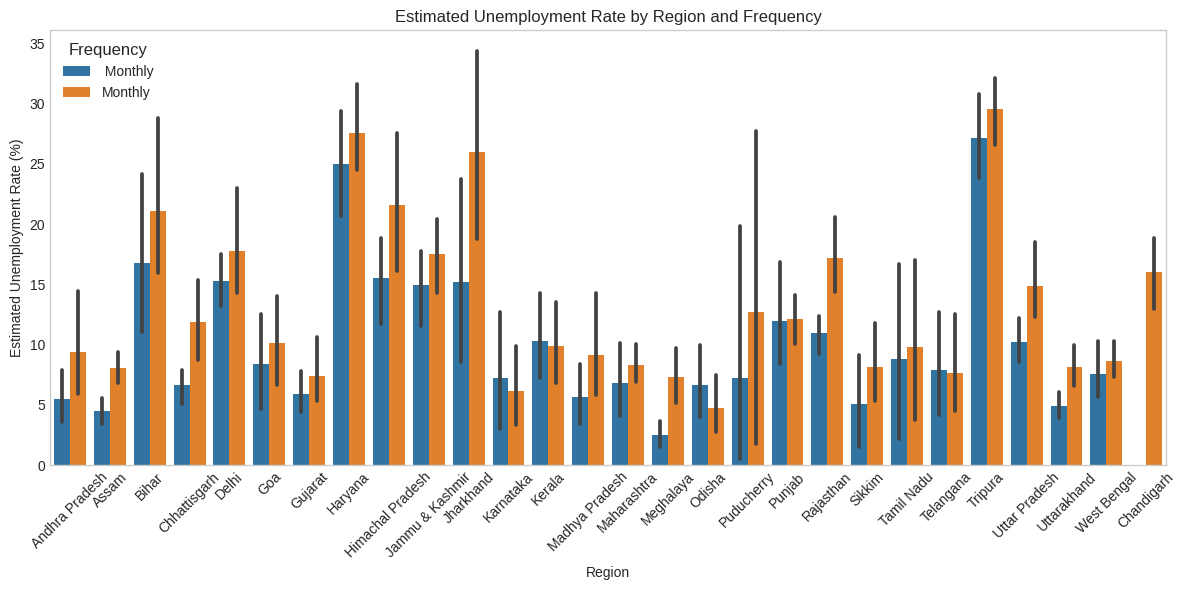

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Estimated_Unemployment_Rate_(%)', hue='Frequency', data=df_cl)
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Estimated Unemployment Rate by Region and Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Frequency', title_fontsize='12')
plt.tight_layout()
plt.show()

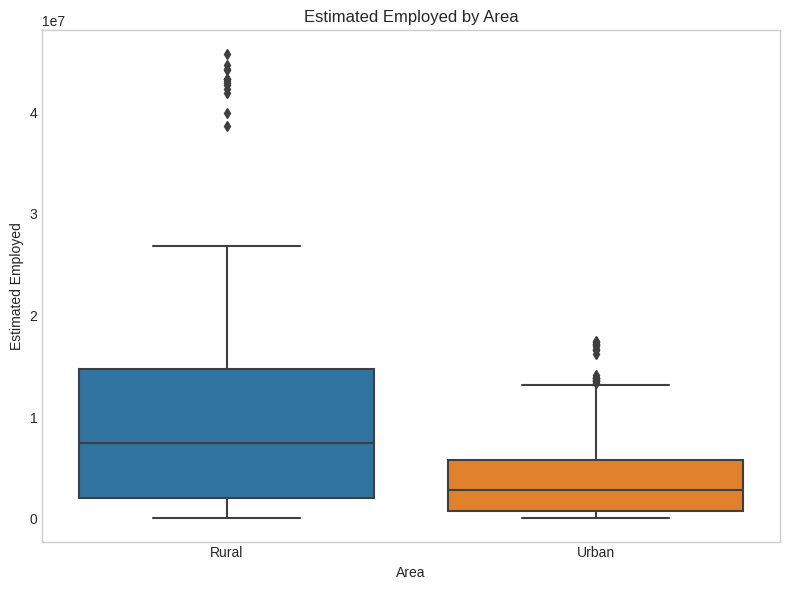

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Area', y='Estimated_Employed', data=df_cl)
plt.xlabel('Area')
plt.ylabel('Estimated Employed')
plt.title('Estimated Employed by Area')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

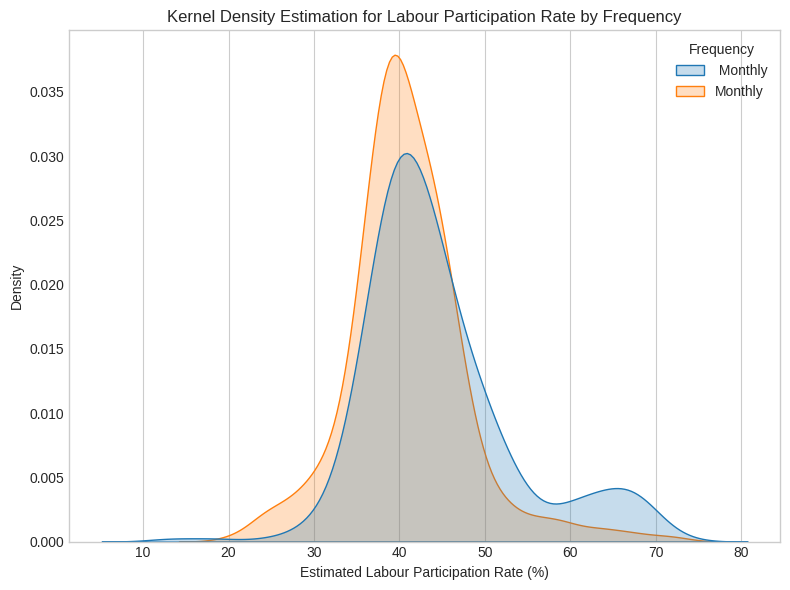

In [43]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df_cl, x='Estimated_Labour_Participation_Rate_(%)', hue='Frequency', fill=True)
plt.xlabel('Estimated Labour Participation Rate (%)')
plt.title('Kernel Density Estimation for Labour Participation Rate by Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

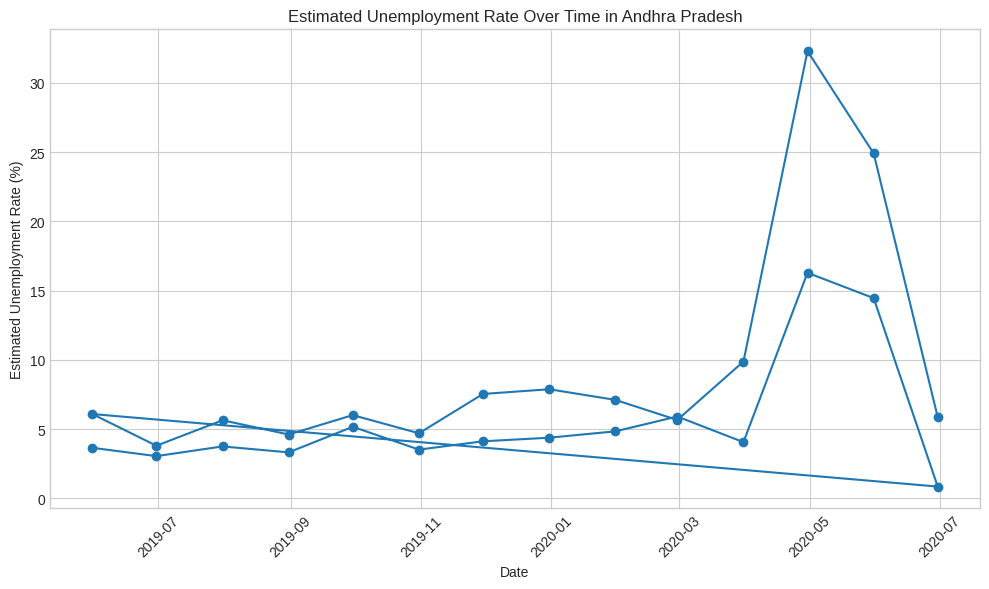

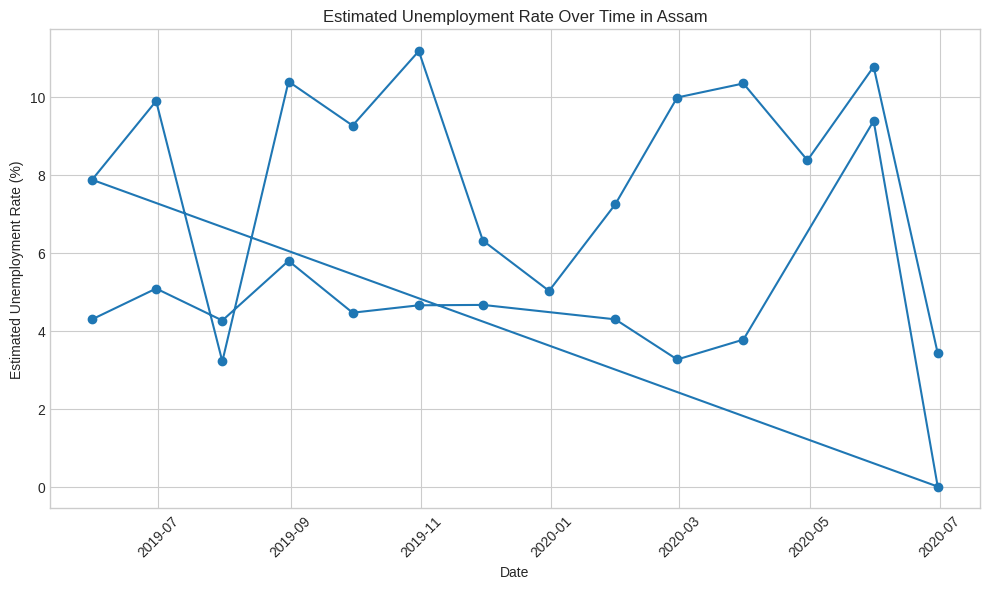

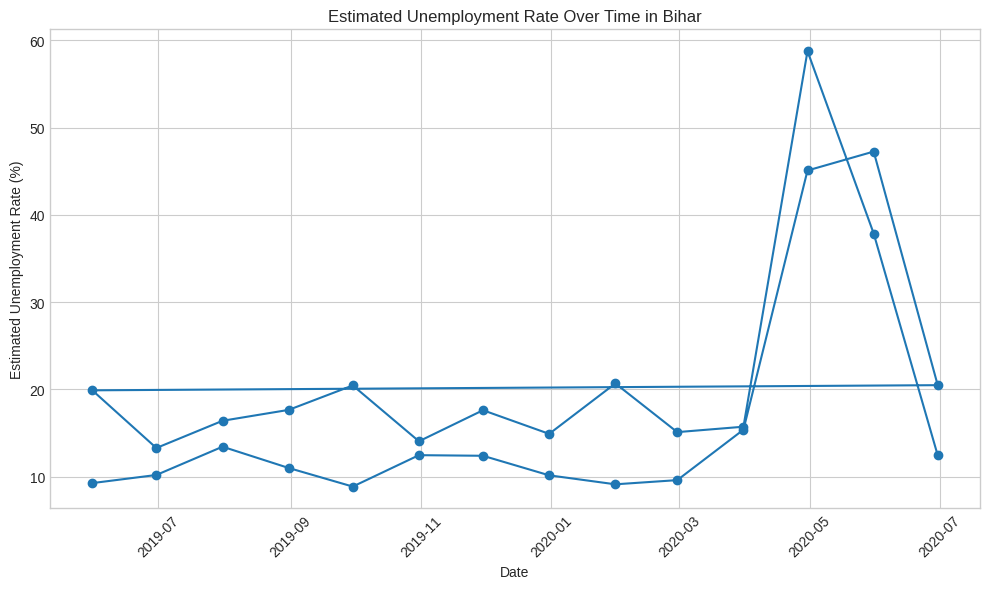

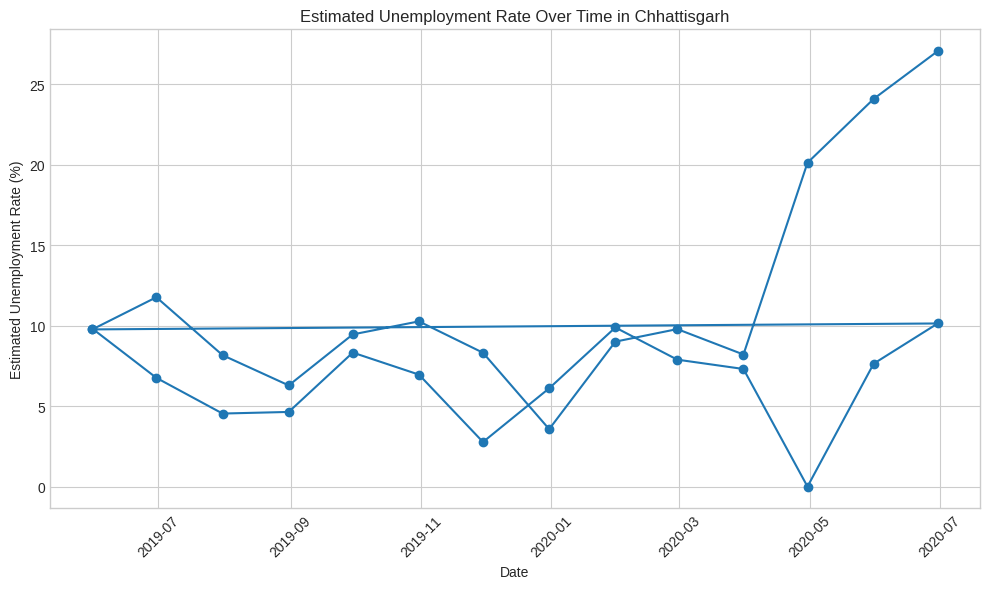

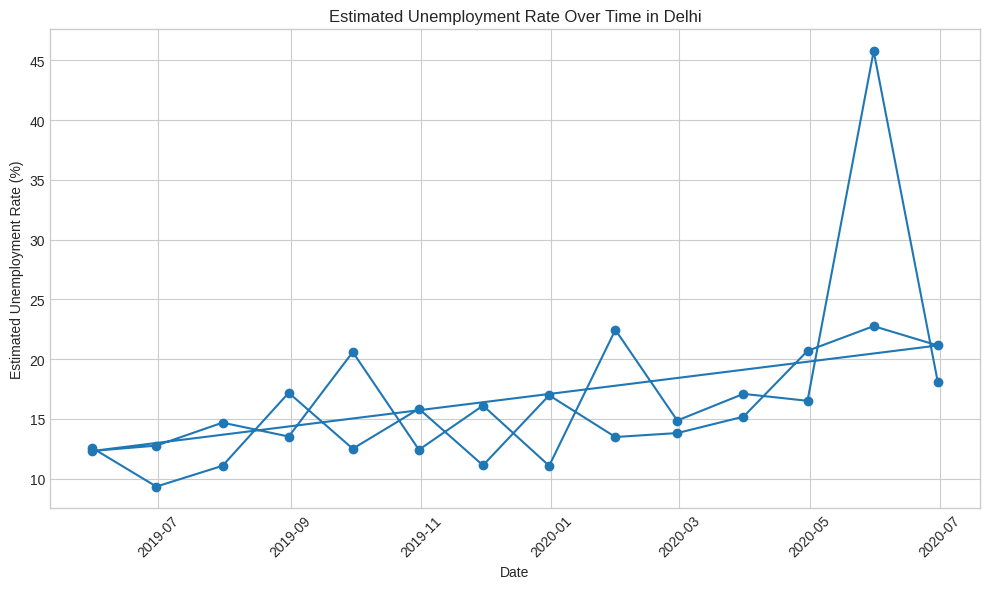

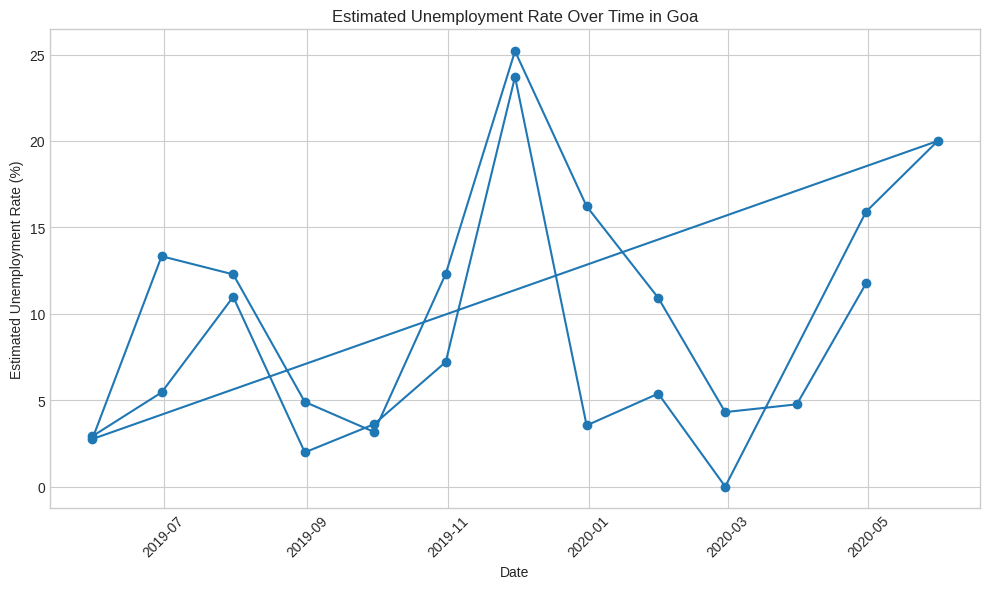

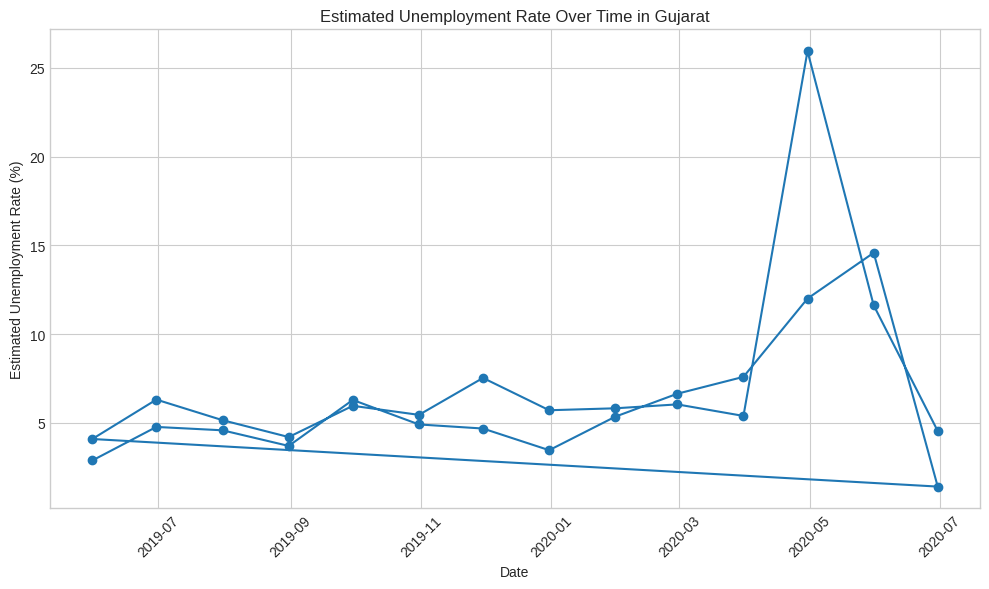

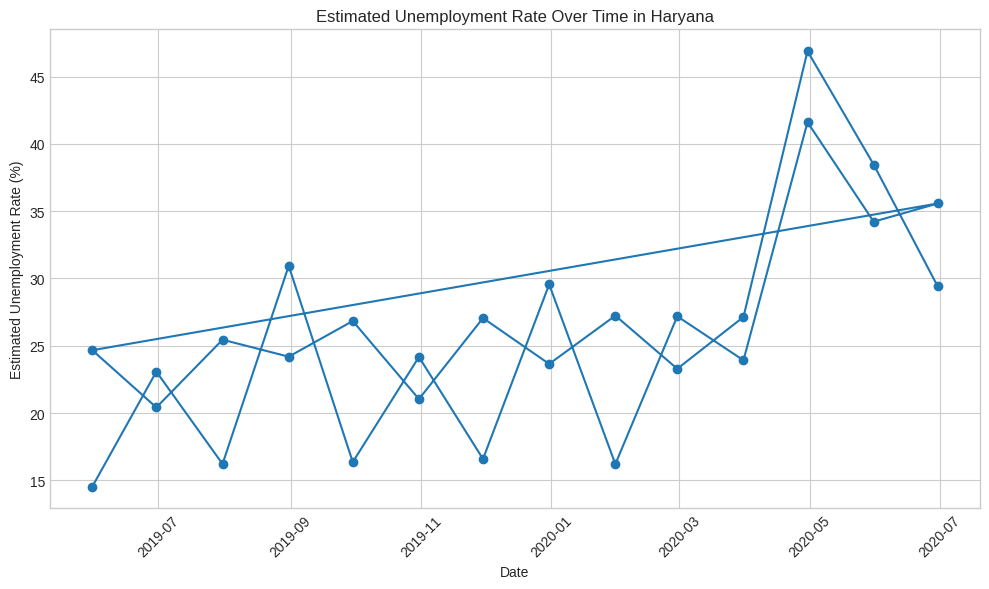

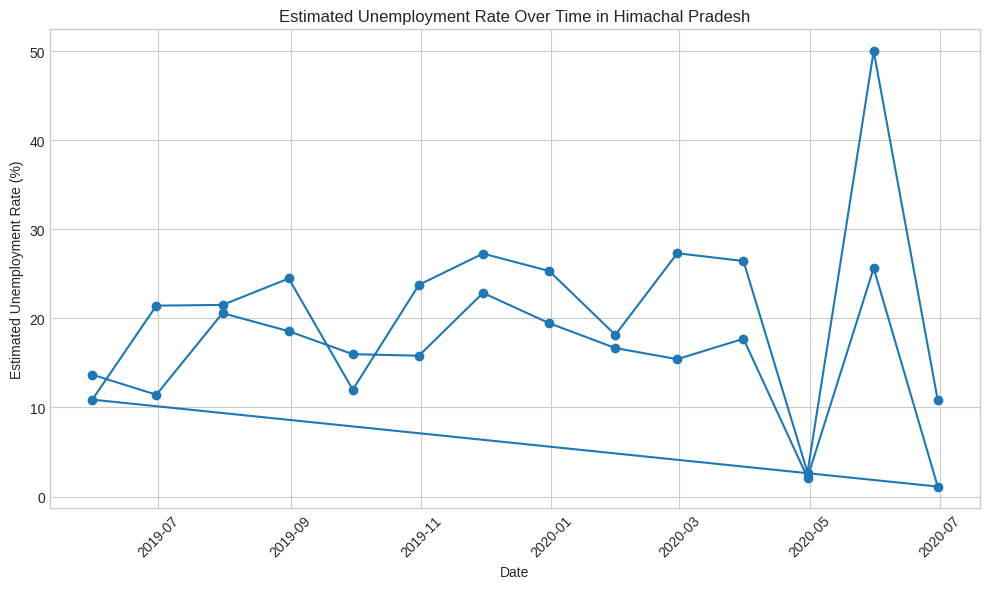

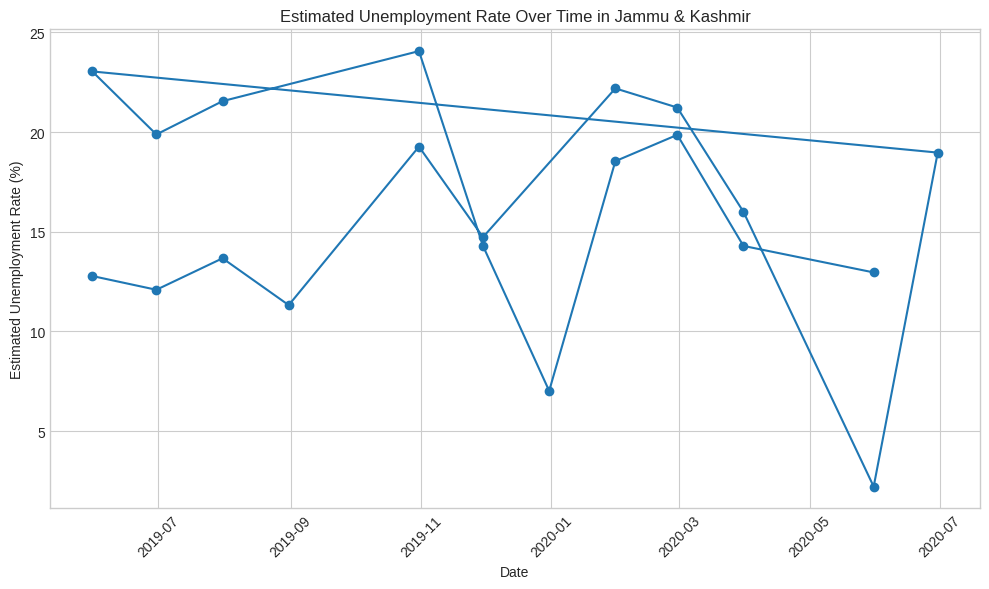

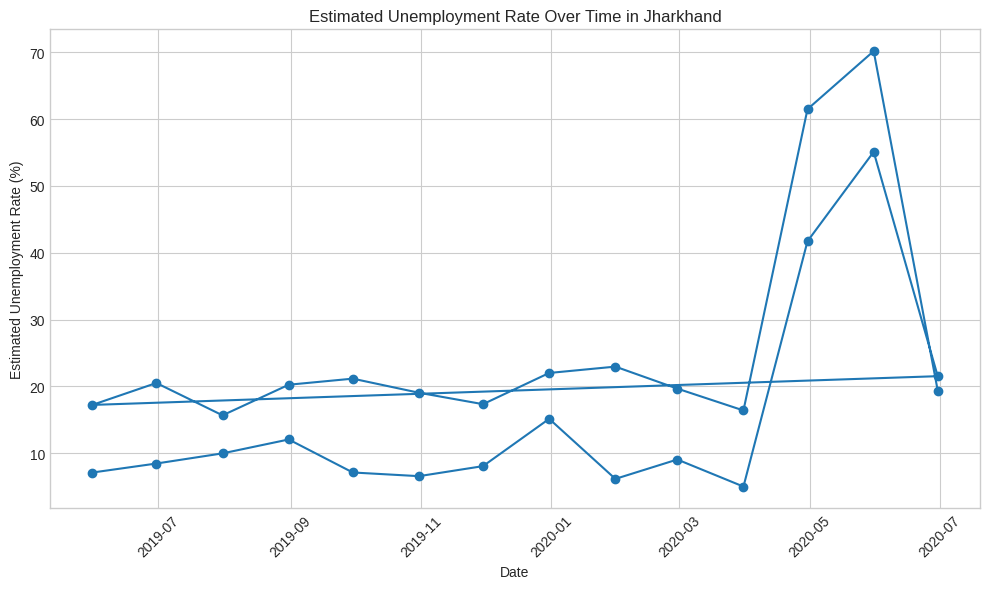

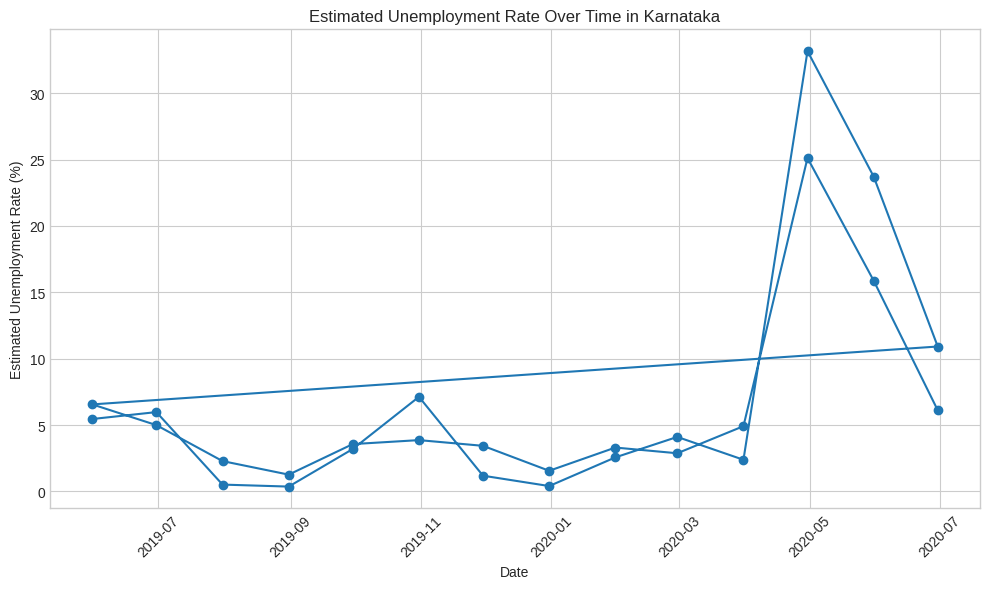

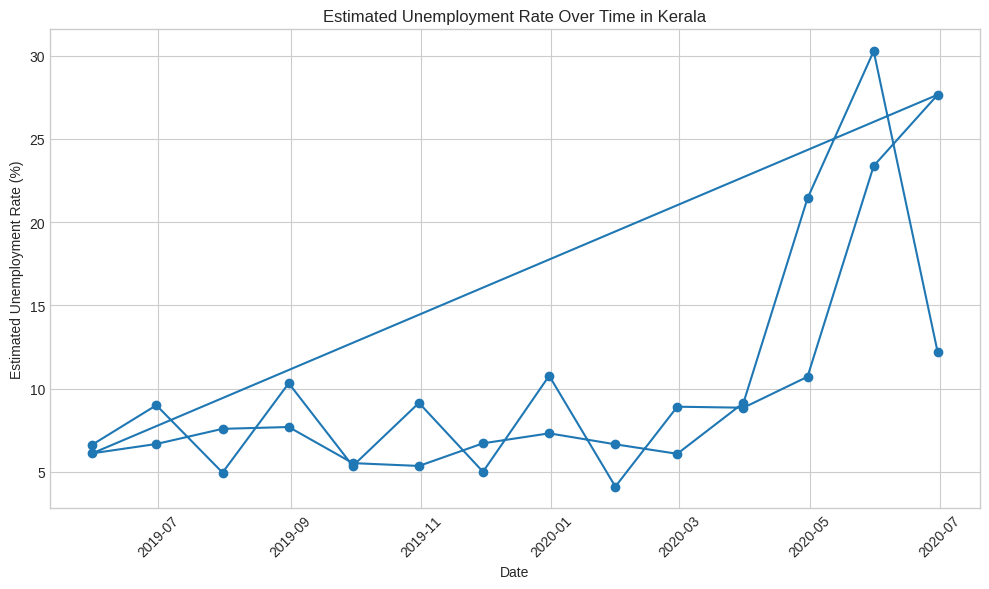

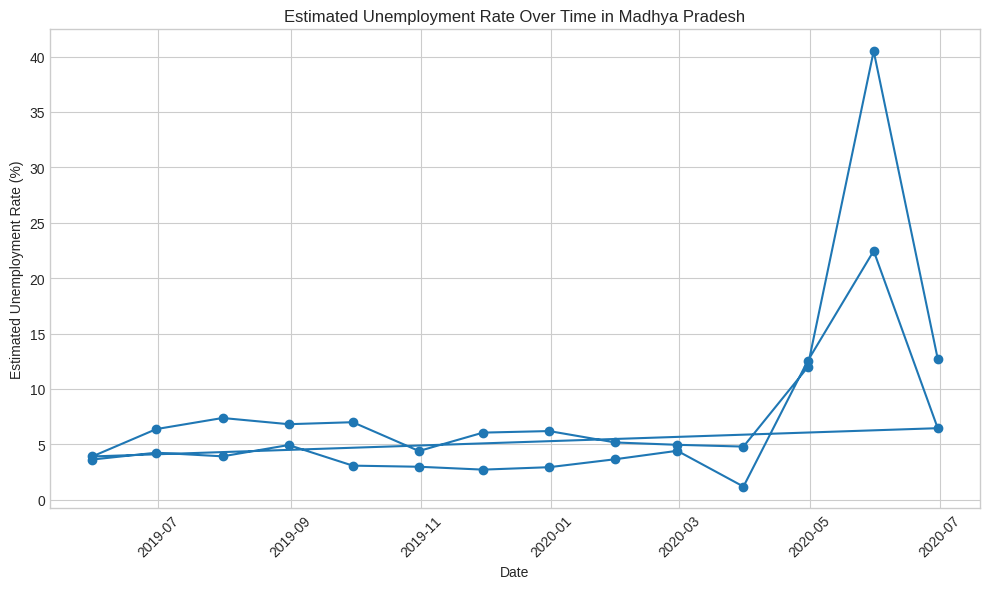

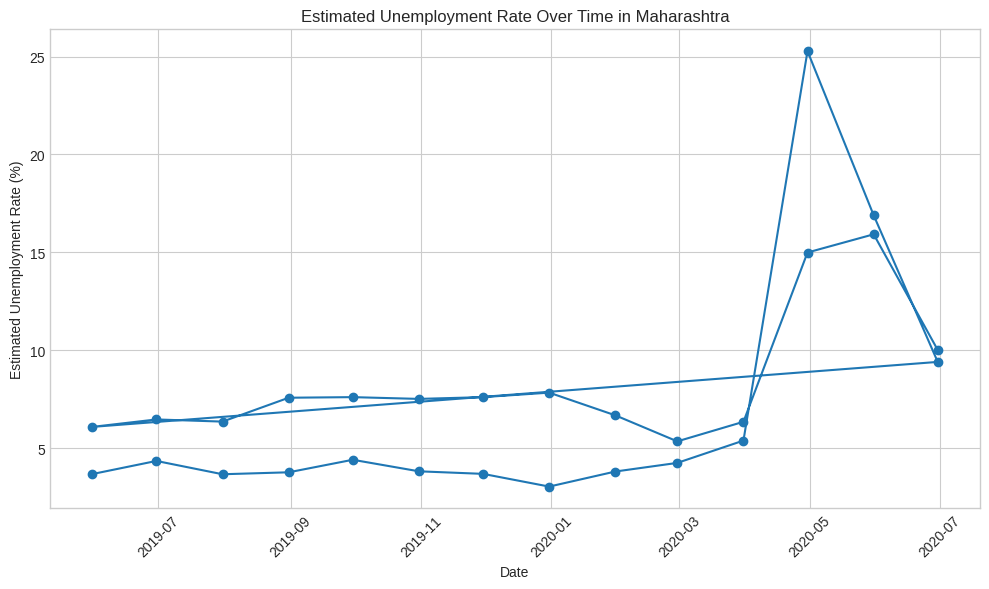

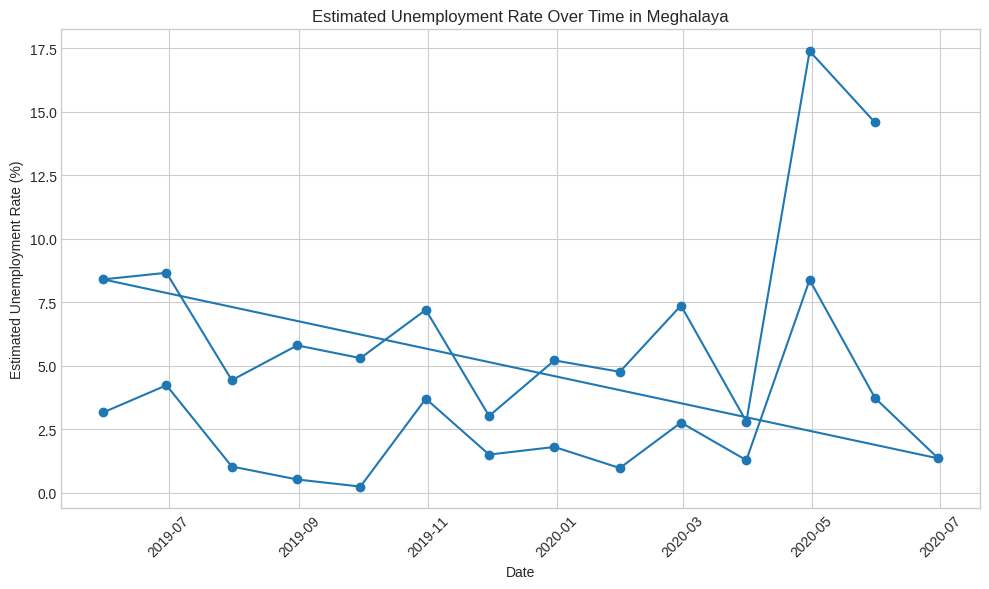

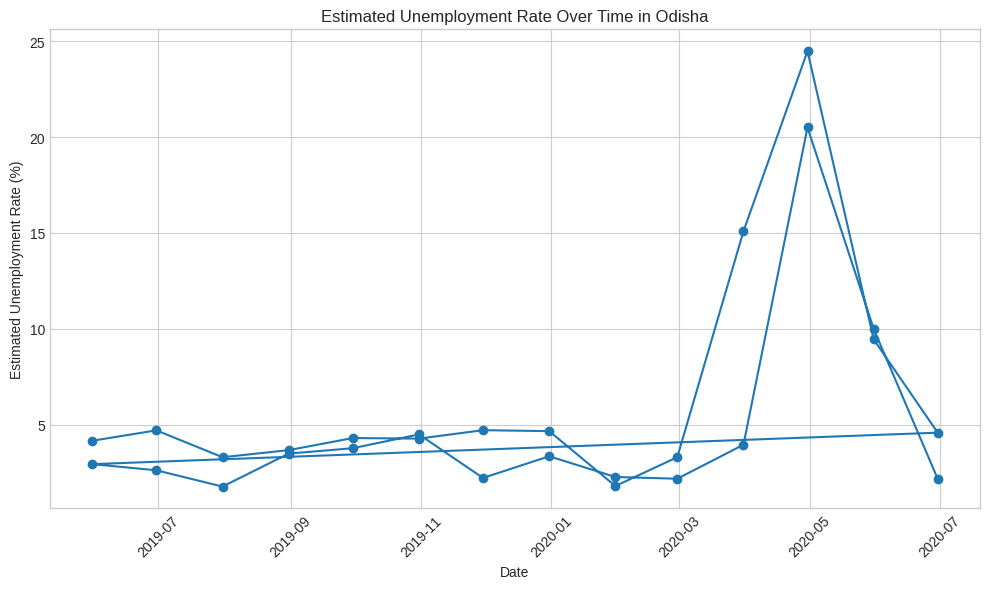

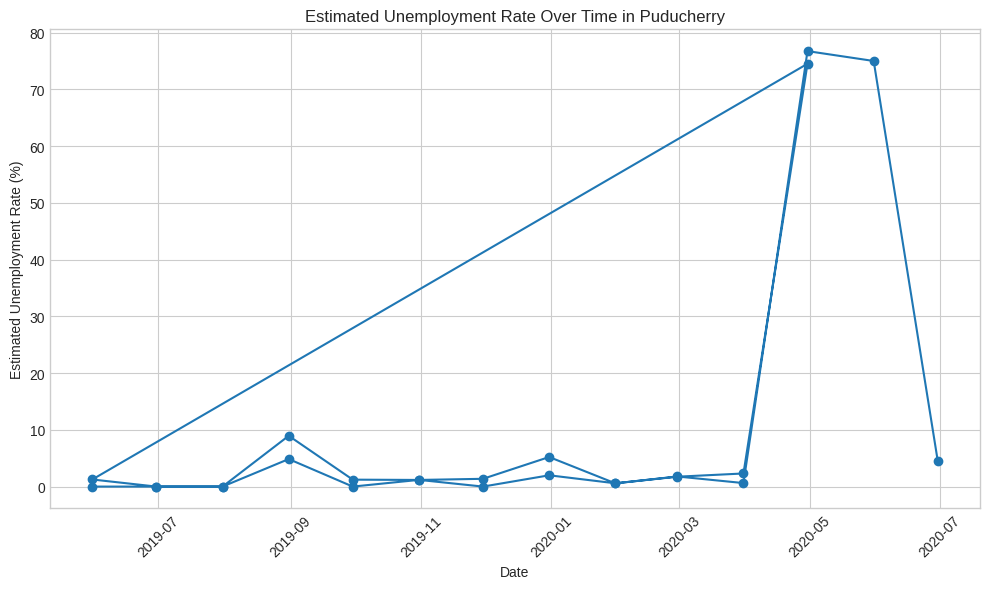

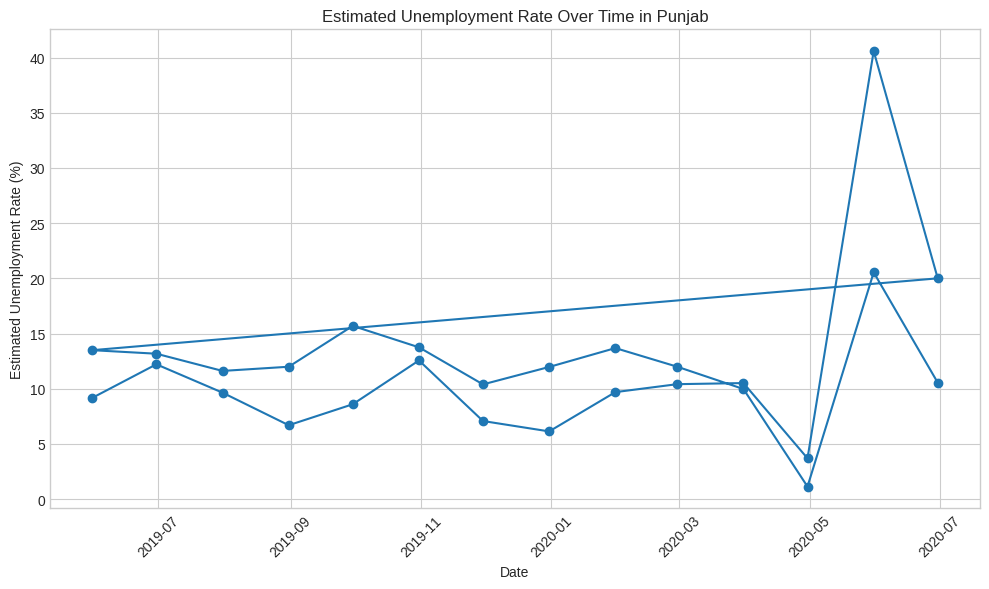

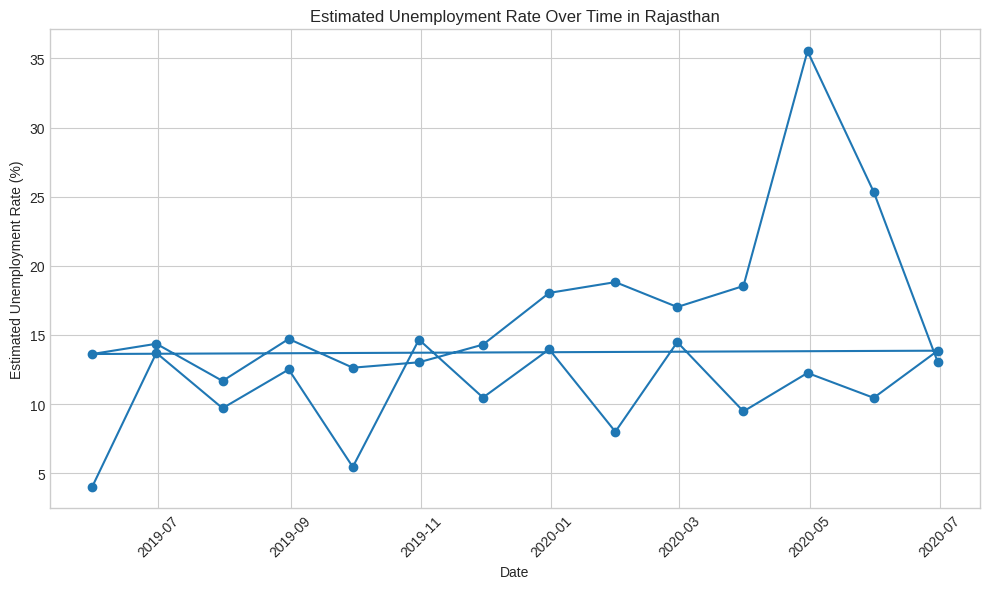

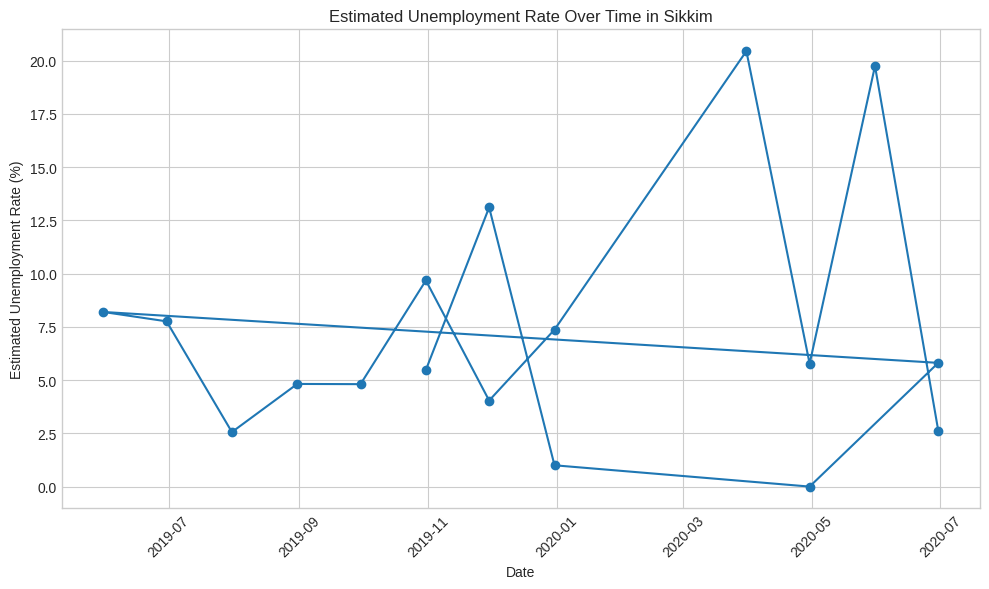

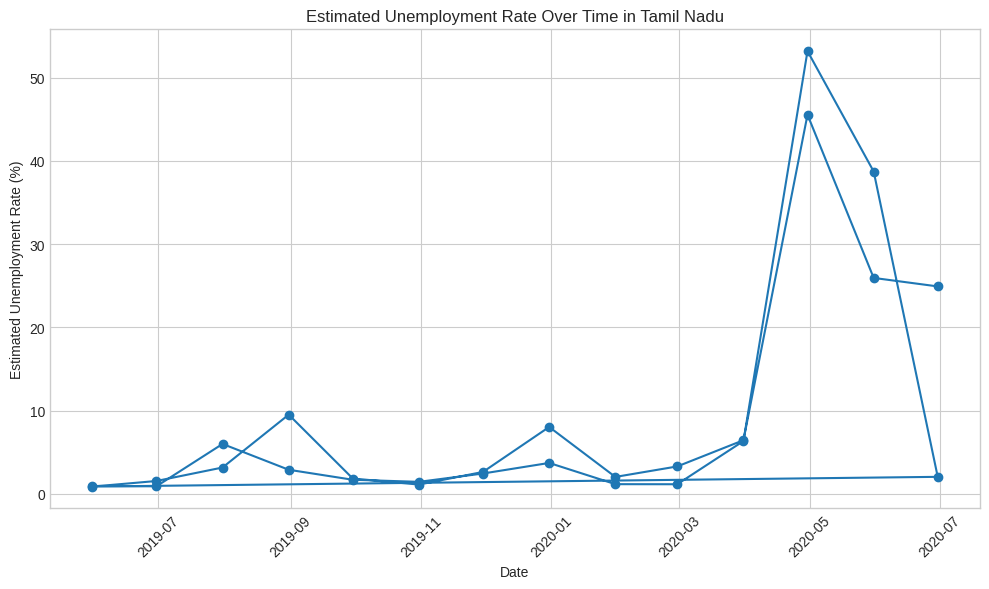

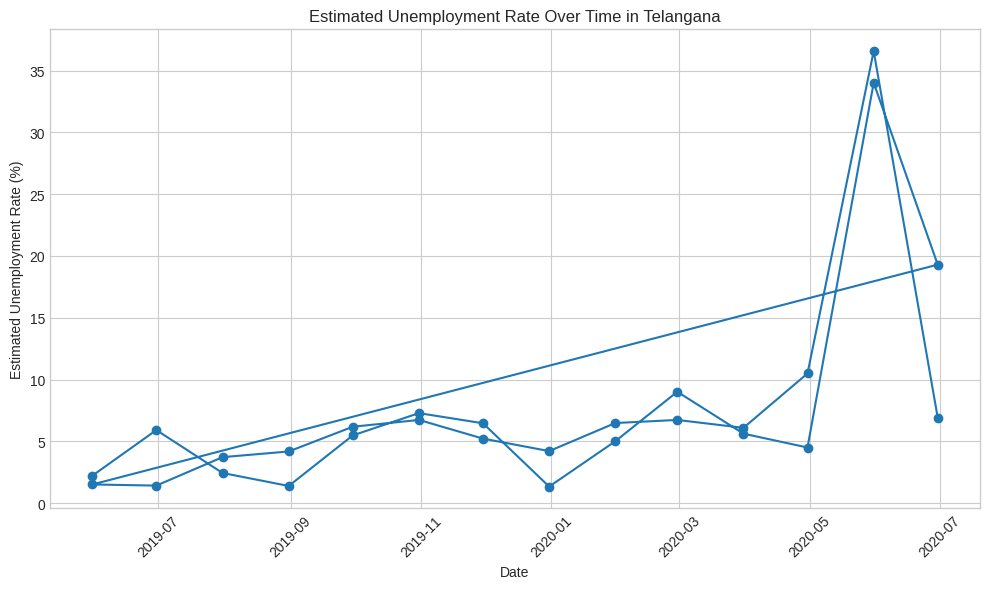

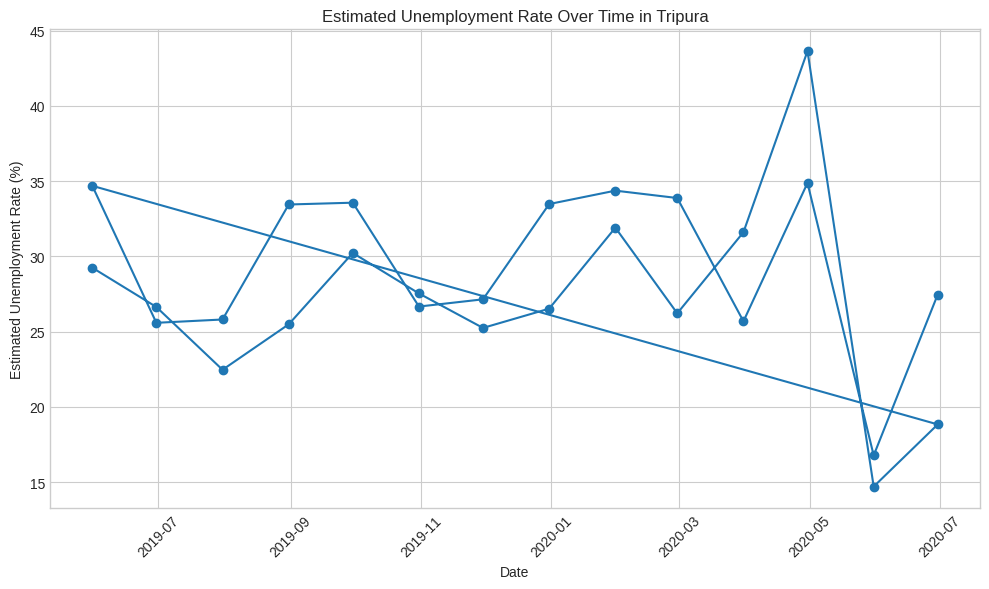

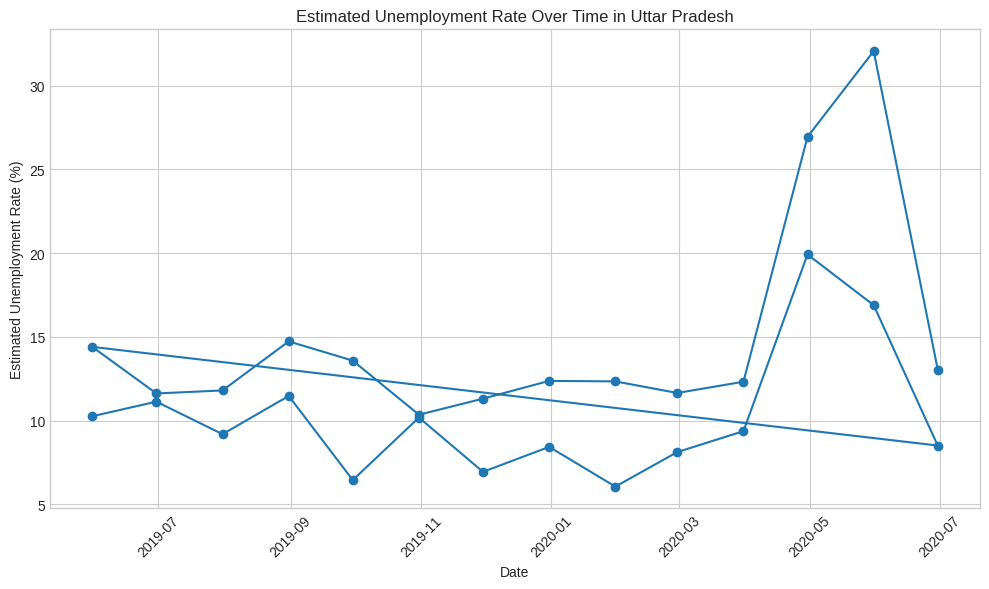

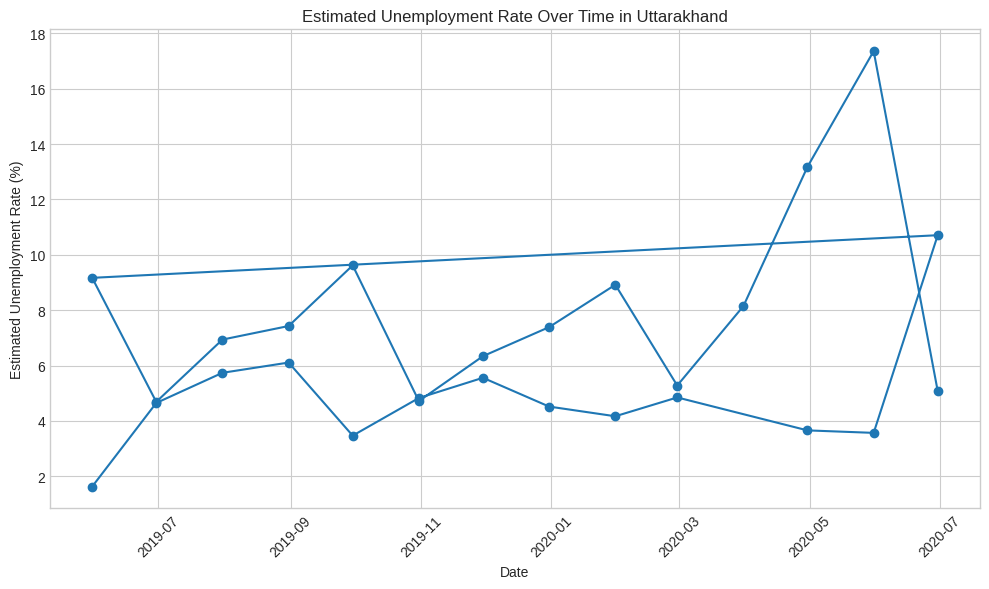

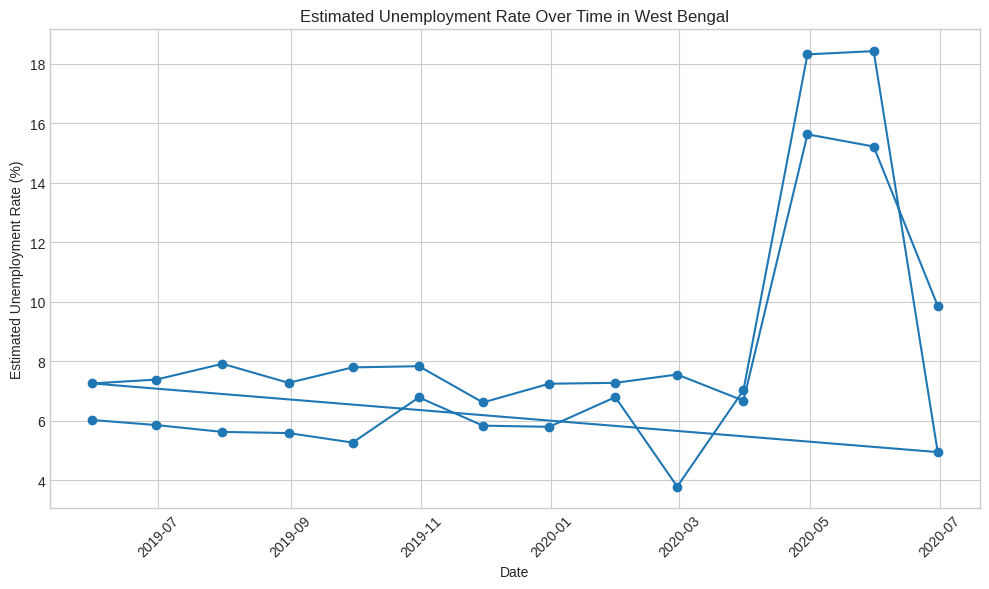

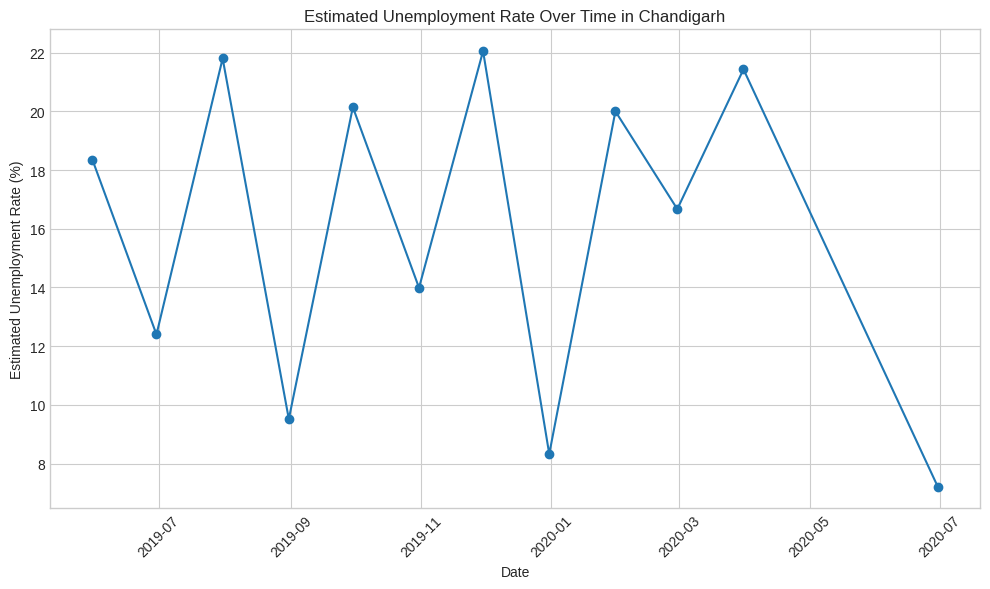

In [44]:
unique_regions = df_cl['Region'].unique()
for region_to_plot in unique_regions:
    data_region = df_cl[df_cl['Region'] == region_to_plot]

    plt.figure(figsize=(10, 6))
    plt.plot(data_region['Date'], data_region['Estimated_Unemployment_Rate_(%)'], marker='o')
    plt.xlabel('Date')
    plt.ylabel('Estimated Unemployment Rate (%)')
    plt.title(f'Estimated Unemployment Rate Over Time in {region_to_plot}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

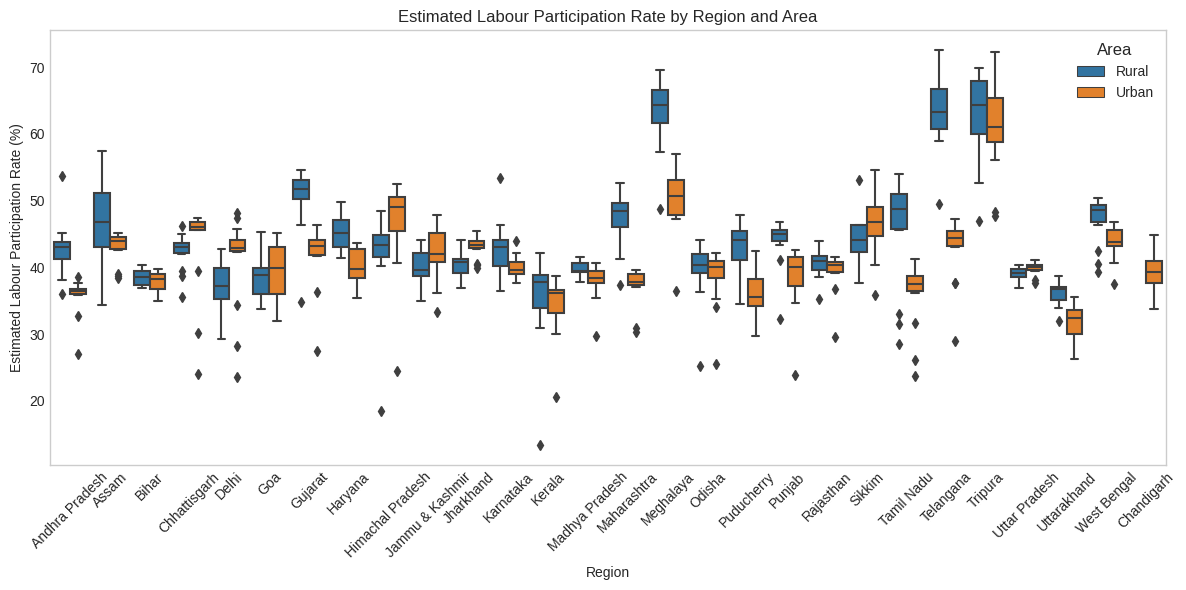

In [45]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Estimated_Labour_Participation_Rate_(%)', hue='Area', data=df_cl)
plt.xlabel('Region')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.title('Estimated Labour Participation Rate by Region and Area')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Area', title_fontsize='12')
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

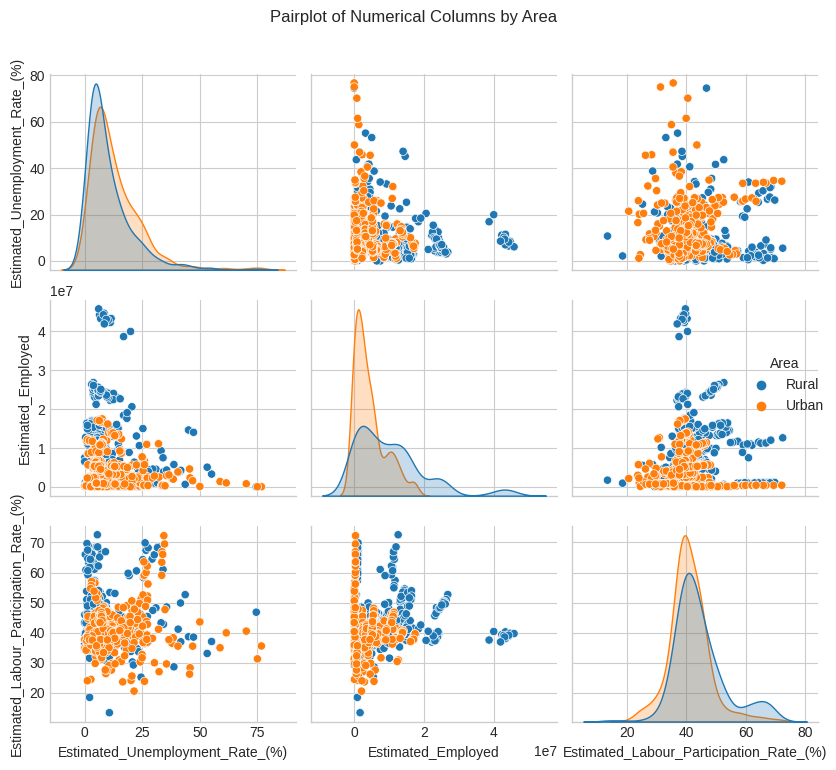

In [46]:
plt.figure(figsize=(10, 8))
sns.pairplot(data=df_cl, vars=['Estimated_Unemployment_Rate_(%)', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate_(%)'], hue='Area')
plt.suptitle('Pairplot of Numerical Columns by Area', y=1.02)
plt.tight_layout()
plt.show()

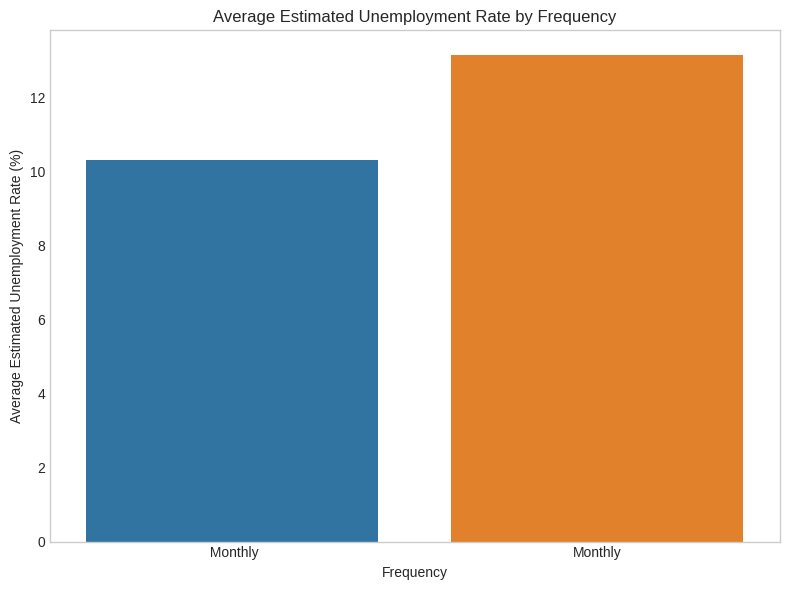

In [47]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Frequency', y='Estimated_Unemployment_Rate_(%)', data=df_cl, ci=None)
plt.xlabel('Frequency')
plt.ylabel('Average Estimated Unemployment Rate (%)')
plt.title('Average Estimated Unemployment Rate by Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [48]:
unemployment_rate = df_cl['Estimated_Unemployment_Rate_(%)']
unemployment_rate

0       3.65
1       3.05
2       3.75
3       3.32
4       5.17
       ...  
749     7.55
750     6.67
751    15.63
752    15.22
753     9.86
Name: Estimated_Unemployment_Rate_(%), Length: 740, dtype: float64

In [49]:
mean_unemployment_rate = unemployment_rate.mean()
median_unemployment_rate = unemployment_rate.median()
std_unemployment_rate = unemployment_rate.std()
min_unemployment_rate = unemployment_rate.min()
max_unemployment_rate = unemployment_rate.max()

print("Descriptive Statistics for Estimated Unemployment Rate (%):")
print(f"Mean: {mean_unemployment_rate:.2f}")
print(f"Median: {median_unemployment_rate:.2f}")
print(f"Standard Deviation: {std_unemployment_rate:.2f}")
print(f"Minimum: {min_unemployment_rate:.2f}")
print(f"Maximum: {max_unemployment_rate:.2f}")

Descriptive Statistics for Estimated Unemployment Rate (%):
Mean: 11.79
Median: 8.35
Standard Deviation: 10.72
Minimum: 0.00
Maximum: 76.74


In [51]:
t_stat, p_value = stats.ttest_1samp(unemployment_rate, 0)
print("One-sample t-test results:")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

One-sample t-test results:
T-statistic: 29.91
P-value: 0.0000


In [53]:
X = df_cl['Estimated_Labour_Participation_Rate_(%)']
X = sm.add_constant(X)
Y = df_cl['Estimated_Unemployment_Rate_(%)']

model = sm.OLS(Y, X).fit()
print("Linear Regression Results:")
print(model.summary())

Linear Regression Results:
                                   OLS Regression Results                                  
Dep. Variable:     Estimated_Unemployment_Rate_(%)   R-squared:                       0.000
Model:                                         OLS   Adj. R-squared:                 -0.001
Method:                              Least Squares   F-statistic:                  0.004829
Date:                             Thu, 10 Aug 2023   Prob (F-statistic):              0.945
Time:                                     12:03:13   Log-Likelihood:                -2805.0
No. Observations:                              740   AIC:                             5614.
Df Residuals:                                  738   BIC:                             5623.
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
                                              coef   

In [54]:
hypothesized_mean = 5.0
unemployment_rate = df_cl['Estimated_Unemployment_Rate_(%)']

t_stat, p_value = stats.ttest_1samp(unemployment_rate, hypothesized_mean)

print("One-sample t-test results:")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("The null hypothesis is rejected. The average estimated unemployment rate is significantly different from 5%.")
else:
    print("The null hypothesis cannot be rejected. There is no significant difference in the average estimated unemployment rate from 5%.")

One-sample t-test results:
T-statistic: 17.22
P-value: 0.0000
The null hypothesis is rejected. The average estimated unemployment rate is significantly different from 5%.


In [55]:
unemployment_rate_andhra = df_cl[df_cl['Region'] == 'Andhra Pradesh']['Estimated_Unemployment_Rate_(%)']
unemployment_rate_westbengal = df_cl[df_cl['Region'] == 'West Bengal']['Estimated_Unemployment_Rate_(%)']

t_stat, p_value = stats.ttest_ind(unemployment_rate_andhra, unemployment_rate_westbengal)

print("Independent Samples t-test results:")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("The null hypothesis is rejected. There is a significant difference in the average estimated unemployment rate between 'Andhra Pradesh' and 'West Bengal'.")
else:
    print("The null hypothesis cannot be rejected. There is no significant difference in the average estimated unemployment rate between 'Andhra Pradesh' and 'West Bengal'.")

Independent Samples t-test results:
T-statistic: -0.44
P-value: 0.6649
The null hypothesis cannot be rejected. There is no significant difference in the average estimated unemployment rate between 'Andhra Pradesh' and 'West Bengal'.


In [56]:
grouped_data = df_cl.groupby('Region')['Estimated_Unemployment_Rate_(%)']

f_stat, p_value = stats.f_oneway(*[group.values for name, group in grouped_data])

print("One-way ANOVA results:")
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("The null hypothesis is rejected. There is a significant difference in the average estimated unemployment rate among different regions.")
else:
    print("The null hypothesis cannot be rejected. There is no significant difference in the average estimated unemployment rate among different regions.")

One-way ANOVA results:
F-statistic: 13.35
P-value: 0.0000
The null hypothesis is rejected. There is a significant difference in the average estimated unemployment rate among different regions.


In [57]:
df_2 = pd.read_csv('/content/unemployment_rate_upto_11_2020.csv')
df_2

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-01-2020          M                              5.48   
1    Andhra Pradesh   29-02-2020          M                              5.83   
2    Andhra Pradesh   31-03-2020          M                              5.79   
3    Andhra Pradesh   30-04-2020          M                             20.51   
4    Andhra Pradesh   31-05-2020          M                             17.43   
..              ...          ...        ...                               ...   
262     West Bengal   30-06-2020          M                              7.29   
263     West Bengal   31-07-2020          M                              6.83   
264     West Bengal   31-08-2020          M                             14.87   
265     West Bengal   30-09-2020          M                              9.35   
266     West Bengal   31-10-2020          M                              9.98   

      Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0               16635535                                     41.02    South   
1               16545652                                     40.90    South   
2               15881197                                     39.18    South   
3               11336911                                     33.10    South   
4               12988845                                     36.46    South   
..                   ...                                       ...      ...   
262             30726310                                     40.39     East   
263             35372506                                     46.17     East   
264             33298644                                     47.48     East   
265             35707239                                     47.73     East   
266             33962549                                     45.63     East   

     longitude  latitude  
0      15.9129    79.740  
1      15.9129    79.740  
2      15.9129    79.740  
3      15.9129    79.740  
4      15.9129    79.740  
..         ...       ...  
262    22.9868    87.855  
263    22.9868    87.855  
264    22.9868    87.855  
265    22.9868    87.855  
266    22.9868    87.855  

[267 rows x 9 columns]

In [58]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [59]:
for i in df_2.columns:
    print('-------------------------------')
    print(df_2[i].value_counts())

-------------------------------
Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: Region, dtype: int64
-------------------------------
 31-03-2020    27
 31-05-2020    27
 30-06-2020    27
 31-07-2020    27
 31-08-2020    27
 30-09-2020    27
 31-10-2020    27
 31-01-2020    26
 29-02-2020    26
 30-04-2020    26
Name:  Date, dtype: int64
-------------------------------
 M    267
Name:  Frequency, dtype: int64
---------

In [60]:
df_2.describe()

Estimated Unemployment Rate (%)   Estimated Employed  \
count                        267.000000         2.670000e+02   
mean                          12.236929         1.396211e+07   
std                           10.803283         1.336632e+07   
min                            0.500000         1.175420e+05   
25%                            4.845000         2.838930e+06   
50%                            9.650000         9.732417e+06   
75%                           16.755000         2.187869e+07   
max                           75.850000         5.943376e+07   

        Estimated Labour Participation Rate (%)   longitude    latitude  
count                                267.000000  267.000000  267.000000  
mean                                  41.681573   22.826048   80.532425  
std                                    7.845419    6.270731    5.831738  
min                                   16.770000   10.850500   71.192400  
25%                                   37.265000   18.112400   76.085600  
50%                                   40.390000   23.610200   79.019300  
75%                                   44.055000   27.278400   85.279900  
max                                   69.690000   33.778200   92.937600

In [61]:
df_2.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [62]:
df_2.rename(columns={
    'Region': 'Region',
    ' Date': 'Date',
    ' Frequency': 'Frequency',
    ' Estimated Unemployment Rate (%)': 'Estimated_Unemployment_Rate',
    ' Estimated Employed': 'Estimated_Employed',
    ' Estimated Labour Participation Rate (%)': 'Estimated_Labour_Participation_Rate'
}, inplace=True)

df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               267 non-null    object 
 1   Date                                 267 non-null    object 
 2   Frequency                            267 non-null    object 
 3   Estimated_Unemployment_Rate          267 non-null    float64
 4   Estimated_Employed                   267 non-null    int64  
 5   Estimated_Labour_Participation_Rate  267 non-null    float64
 6   Region.1                             267 non-null    object 
 7   longitude                            267 non-null    float64
 8   latitude                             267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [63]:
unique_values_region = df_2['Region'].unique()
unique_values_frequency = df_2['Frequency'].unique()
print("\nUnique Values - Region:")
print(unique_values_region)
print("\nUnique Values - Frequency:")
print(unique_values_frequency)


Unique Values - Region:
['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']

Unique Values - Frequency:
[' M']


In [64]:
data_types = {
    'Region': str,
    'Date': 'datetime64',
    'Frequency': str,
    'Estimated_Unemployment_Rate': float,
    'Estimated_Employed': float,
    'Estimated_Labour_Participation_Rate': float
}
df_2 = df_2.astype(data_types)

df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Region                               267 non-null    object        
 1   Date                                 267 non-null    datetime64[ns]
 2   Frequency                            267 non-null    object        
 3   Estimated_Unemployment_Rate          267 non-null    float64       
 4   Estimated_Employed                   267 non-null    float64       
 5   Estimated_Labour_Participation_Rate  267 non-null    float64       
 6   Region.1                             267 non-null    object        
 7   longitude                            267 non-null    float64       
 8   latitude                             267 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 18.9+ KB


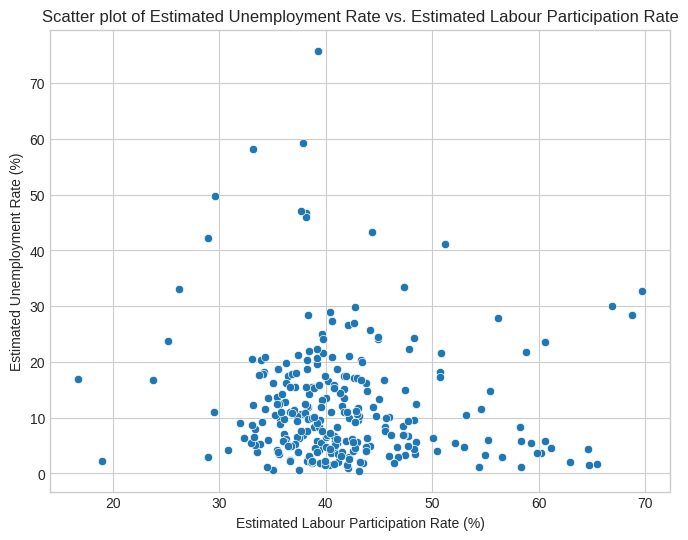

In [65]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Estimated_Labour_Participation_Rate', y='Estimated_Unemployment_Rate', data=df_2)
plt.xlabel('Estimated Labour Participation Rate (%)')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Scatter plot of Estimated Unemployment Rate vs. Estimated Labour Participation Rate')
plt.grid(True)
plt.show()

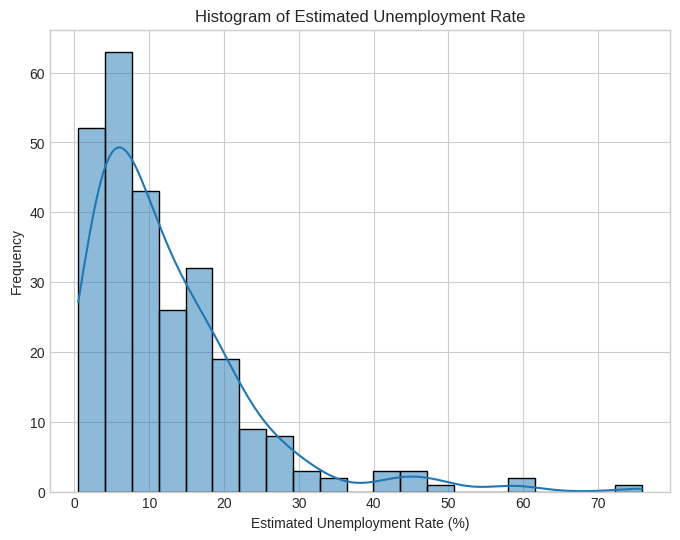

In [66]:
plt.figure(figsize=(8, 6))
sns.histplot(df_2['Estimated_Unemployment_Rate'], kde=True)
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Estimated Unemployment Rate')
plt.grid(True)
plt.show()

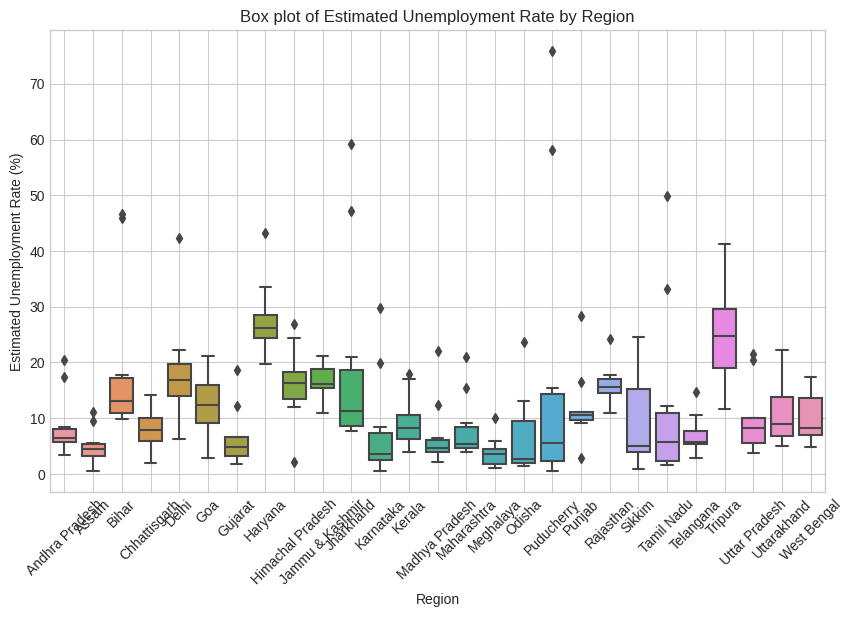

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Estimated_Unemployment_Rate', data=df_2)
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Box plot of Estimated Unemployment Rate by Region')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [68]:
correlation_matrix = df_2.corr()
print(correlation_matrix)

                                     Estimated_Unemployment_Rate  \
Estimated_Unemployment_Rate                             1.000000   
Estimated_Employed                                     -0.245176   
Estimated_Labour_Participation_Rate                    -0.073540   
longitude                                               0.149976   
latitude                                               -0.023976   

                                     Estimated_Employed  \
Estimated_Unemployment_Rate                   -0.245176   
Estimated_Employed                             1.000000   
Estimated_Labour_Participation_Rate           -0.047948   
longitude                                     -0.113664   
latitude                                      -0.119321   

                                     Estimated_Labour_Participation_Rate  \
Estimated_Unemployment_Rate                                    -0.073540   
Estimated_Employed                                             -0.047948   
Estimate

In [69]:
average_unemployment_rate_by_region = df_2.groupby('Region')['Estimated_Unemployment_Rate'].mean()
print(average_unemployment_rate_by_region)

Region
Andhra Pradesh       8.664000
Assam                4.856000
Bihar               19.471000
Chhattisgarh         7.819000
Delhi               18.414000
Goa                 12.167000
Gujarat              6.376000
Haryana             27.477000
Himachal Pradesh    16.065000
Jammu & Kashmir     16.477778
Jharkhand           19.539000
Karnataka            7.668000
Kerala               9.434000
Madhya Pradesh       6.854000
Maharashtra          7.979000
Meghalaya            3.866000
Odisha               6.462000
Puducherry          17.942000
Punjab              11.981000
Rajasthan           15.868000
Sikkim               9.792500
Tamil Nadu          12.187000
Telangana            6.833000
Tripura             25.055000
Uttar Pradesh        9.737000
Uttarakhand         11.156000
West Bengal         10.192000
Name: Estimated_Unemployment_Rate, dtype: float64


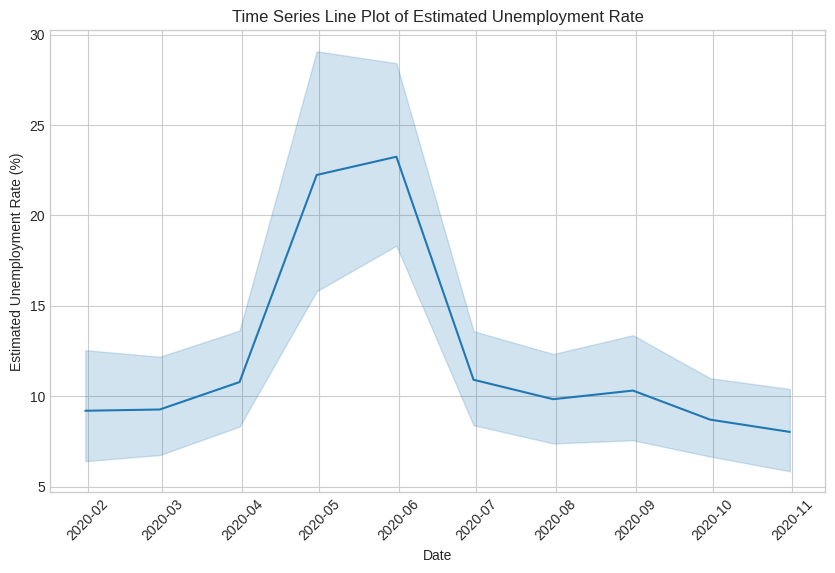

In [70]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Estimated_Unemployment_Rate', data=df_2)
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Time Series Line Plot of Estimated Unemployment Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [73]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Region                               267 non-null    object        
 1   Date                                 267 non-null    datetime64[ns]
 2   Frequency                            267 non-null    object        
 3   Estimated_Unemployment_Rate          267 non-null    float64       
 4   Estimated_Employed                   267 non-null    float64       
 5   Estimated_Labour_Participation_Rate  267 non-null    float64       
 6   Region.1                             267 non-null    object        
 7   longitude                            267 non-null    float64       
 8   latitude                             267 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 18.9+ KB


In [74]:
df_stats = df_2[['Estimated_Unemployment_Rate', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate']]
round(df_stats.describe().T, 2)

count         mean          std  \
Estimated_Unemployment_Rate          267.0        12.24        10.80   
Estimated_Employed                   267.0  13962105.72  13366318.36   
Estimated_Labour_Participation_Rate  267.0        41.68         7.85   

                                           min         25%         50%  \
Estimated_Unemployment_Rate               0.50        4.84        9.65   
Estimated_Employed                   117542.00  2838930.50  9732417.00   
Estimated_Labour_Participation_Rate      16.77       37.26       40.39   

                                             75%          max  
Estimated_Unemployment_Rate                16.76        75.85  
Estimated_Employed                   21878686.00  59433759.00  
Estimated_Labour_Participation_Rate        44.06        69.69

In [75]:
region_stats = df_2.groupby(['Region'])[['Estimated_Unemployment_Rate', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate']].mean().reset_index()
region_stats = round(region_stats, 2)
region_stats

Region  Estimated_Unemployment_Rate  Estimated_Employed  \
0     Andhra Pradesh                         8.66         15425480.00   
1              Assam                         4.86         10810275.50   
2              Bihar                        19.47         23606828.00   
3       Chhattisgarh                         7.82          8421349.20   
4              Delhi                        18.41          4632821.90   
5                Goa                        12.17           442374.80   
6            Gujarat                         6.38         22730746.10   
7            Haryana                        27.48          6844059.00   
8   Himachal Pradesh                        16.07          2033884.90   
9    Jammu & Kashmir                        16.48          3310031.67   
10         Jharkhand                        19.54          8770642.40   
11         Karnataka                         7.67         21624017.60   
12            Kerala                         9.43          8596794.90   
13    Madhya Pradesh                         6.85         22318335.30   
14       Maharashtra                         7.98         39204758.20   
15         Meghalaya                         3.87          1349815.30   
16            Odisha                         6.46         12726832.90   
17        Puducherry                        17.94           365262.90   
18            Punjab                        11.98          8783034.20   
19         Rajasthan                        15.87         19731752.20   
20            Sikkim                         9.79           234523.25   
21        Tamil Nadu                        12.19         21987898.10   
22         Telangana                         6.83         16244082.50   
23           Tripura                        25.06          1397291.60   
24     Uttar Pradesh                         9.74         55524799.00   
25       Uttarakhand                        11.16          2743274.90   
26       West Bengal                        10.19         33305164.30   

    Estimated_Labour_Participation_Rate  
0                                 38.96  
1                                 43.50  
2                                 37.17  
3                                 41.16  
4                                 35.86  
5                                 39.24  
6                                 45.49  
7                                 42.10  
8                                 40.25  
9                                 37.89  
10                                40.36  
11                                42.00  
12                                33.38  
13                                38.93  
14                                41.47  
15                                59.86  
16                                37.75  
17                                35.92  
18                                39.98  
19                                40.59  
20                                45.76  
21                                37.38  
22                                54.97  
23                                57.85  
24                                37.61  
25                                35.26  
26                                45.16

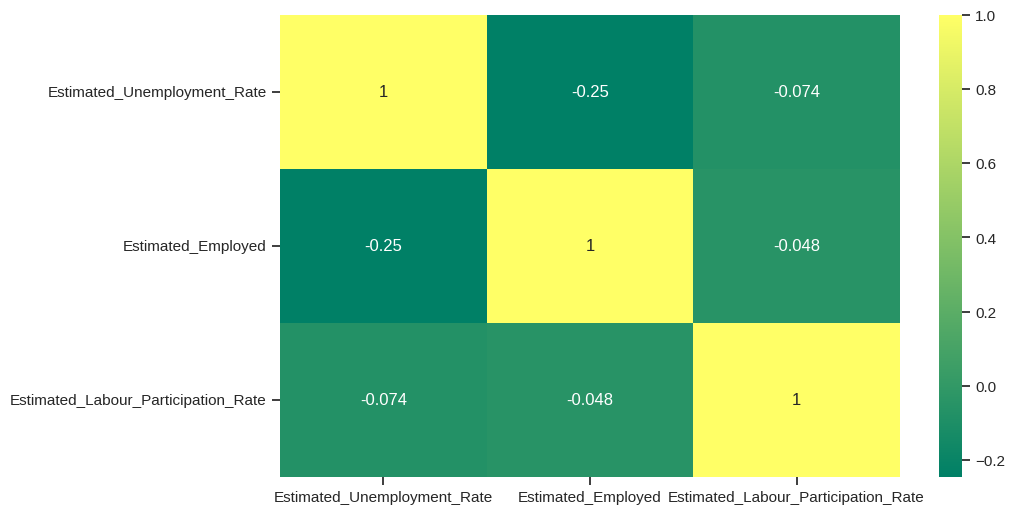

In [76]:
heat_maps = df_2[['Estimated_Unemployment_Rate', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate']]
heat_maps = heat_maps.corr()
plt.figure(figsize=(10, 6))
sns.set_context('notebook', font_scale=1)
sns.heatmap(heat_maps, annot=True, cmap='summer')
plt.show()

In [79]:
df_2['Month'] = df_2['Date'].dt.month
df_2['Month_int'] = df_2['Month'].apply(lambda x: int(x))
df_2['Month_name'] = df_2['Month_int'].apply(lambda x: calendar.month_abbr[x])
lock = df_2[(df_2['Month_int'] >= 4) & (df_2['Month_int'] <= 7)]
bf_lock = df_2[(df_2['Month_int'] >= 1) & (df_2['Month_int'] <= 4)]
g_lock = lock.groupby('Region')['Estimated_Unemployment_Rate'].mean().reset_index()
g_bf_lock = bf_lock.groupby('Region')['Estimated_Unemployment_Rate'].mean().reset_index()
g_lock['Unemployment Rate before lockdown'] = g_bf_lock['Estimated_Unemployment_Rate']
g_lock.columns = ['Region', 'Unemployment Rate after lockdown', 'Unemployment Rate before lockdown']
g_lock['percentage change in unemployment'] = round((g_lock['Unemployment Rate after lockdown'] - g_lock['Unemployment Rate before lockdown']) / g_lock['Unemployment Rate before lockdown'] * 100, 2)
g_lock.head(2)

Region  Unemployment Rate after lockdown  \
0  Andhra Pradesh                           12.3975   
1           Assam                            6.2450   

   Unemployment Rate before lockdown  percentage change in unemployment  
0                             9.4025                              31.85  
1                             6.2250                               0.32

In [80]:
plot_per = g_lock.sort_values('percentage change in unemployment')

In [81]:
def sort_impact(x):
    if x <= 10:
        return 'Impacted Regions'
    elif x <= 20:
        return 'Hard Impacted Regions'
    elif x <= 30:
        return 'Harder Impacted Regions'
    elif x <= 40:
        return 'Hardest Impacted Regions'
    return x

plot_per['impact status'] = plot_per['percentage change in unemployment'].apply(lambda x: sort_impact(x))

In [85]:
X = df_2['Estimated_Labour_Participation_Rate']
Y = df_2['Estimated_Unemployment_Rate']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     Estimated_Unemployment_Rate   R-squared:                       0.005
Model:                                     OLS   Adj. R-squared:                  0.002
Method:                          Least Squares   F-statistic:                     1.441
Date:                         Thu, 10 Aug 2023   Prob (F-statistic):              0.231
Time:                                 12:14:48   Log-Likelihood:                -1013.1
No. Observations:                          267   AIC:                             2030.
Df Residuals:                              265   BIC:                             2037.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------

In [86]:
df_2.columns

Index(['Region', 'Date', 'Frequency', 'Estimated_Unemployment_Rate',
       'Estimated_Employed', 'Estimated_Labour_Participation_Rate', 'Region.1',
       'longitude', 'latitude', 'Month', 'Month_int', 'Month_name'],
      dtype='object')

In [87]:
df_2 = df_2.drop(['Region.1','longitude', 'latitude', 'Month', 'Month_int', 'Month_name'],axis = 1)

In [88]:
df_2.shape

(267, 6)

In [89]:
df_cl.shape

(740, 7)

In [90]:
columns_mapping = {
    'Region': 'Region',
    'Date': 'Date',
    'Frequency': 'Frequency',
    'Estimated_Unemployment_Rate_(%)': 'Estimated_Unemployment_Rate',
    'Estimated_Employed': 'Estimated_Employed',
    'Estimated_Labour_Participation_Rate_(%)': 'Estimated_Labour_Participation_Rate',
    'Area': 'Area'
}
df_cl.rename(columns=columns_mapping, inplace=True)

df_cl.columns

Index(['Region', 'Date', 'Frequency', 'Estimated_Unemployment_Rate',
       'Estimated_Employed', 'Estimated_Labour_Participation_Rate', 'Area'],
      dtype='object')

In [91]:
common_columns = ['Region', 'Date', 'Frequency','Estimated_Unemployment_Rate', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate']
print(df_cl[common_columns].isnull().sum())
print(df_2[common_columns].isnull().sum())

Region                                 0
Date                                   0
Frequency                              0
Estimated_Unemployment_Rate            0
Estimated_Employed                     0
Estimated_Labour_Participation_Rate    0
dtype: int64
Region                                 0
Date                                   0
Frequency                              0
Estimated_Unemployment_Rate            0
Estimated_Employed                     0
Estimated_Labour_Participation_Rate    0
dtype: int64


In [92]:
common_columns = ['Region', 'Date', 'Frequency','Estimated_Unemployment_Rate', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate']
merged_df = pd.merge(df_cl, df_2, on=common_columns,how = 'outer')
merged_df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated_Unemployment_Rate',
       'Estimated_Employed', 'Estimated_Labour_Participation_Rate', 'Area'],
      dtype='object')

In [93]:
merged_df.drop('Area',axis = 1,inplace = True)
merged_df

Region       Date Frequency  Estimated_Unemployment_Rate  \
0     Andhra Pradesh 2019-05-31   Monthly                         3.65   
1     Andhra Pradesh 2019-06-30   Monthly                         3.05   
2     Andhra Pradesh 2019-07-31   Monthly                         3.75   
3     Andhra Pradesh 2019-08-31   Monthly                         3.32   
4     Andhra Pradesh 2019-09-30   Monthly                         5.17   
...              ...        ...       ...                          ...   
1002     West Bengal 2020-06-30         M                         7.29   
1003     West Bengal 2020-07-31         M                         6.83   
1004     West Bengal 2020-08-31         M                        14.87   
1005     West Bengal 2020-09-30         M                         9.35   
1006     West Bengal 2020-10-31         M                         9.98   

      Estimated_Employed  Estimated_Labour_Participation_Rate  
0             11999139.0                                43.24  
1             11755881.0                                42.05  
2             12086707.0                                43.50  
3             12285693.0                                43.97  
4             12256762.0                                44.68  
...                  ...                                  ...  
1002          30726310.0                                40.39  
1003          35372506.0                                46.17  
1004          33298644.0                                47.48  
1005          35707239.0                                47.73  
1006          33962549.0                                45.63  

[1007 rows x 6 columns]

In [94]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1007 entries, 0 to 1006
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Region                               1007 non-null   object        
 1   Date                                 1007 non-null   datetime64[ns]
 2   Frequency                            1007 non-null   object        
 3   Estimated_Unemployment_Rate          1007 non-null   float64       
 4   Estimated_Employed                   1007 non-null   float64       
 5   Estimated_Labour_Participation_Rate  1007 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 55.1+ KB


In [95]:
merged_df.isnull().sum()

Region                                 0
Date                                   0
Frequency                              0
Estimated_Unemployment_Rate            0
Estimated_Employed                     0
Estimated_Labour_Participation_Rate    0
dtype: int64

In [96]:
categorical_columns = ['Region', 'Frequency']
label_encoder = LabelEncoder()
for column in categorical_columns:
    merged_df[column] = label_encoder.fit_transform(merged_df[column])
merged_df

Region       Date  Frequency  Estimated_Unemployment_Rate  \
0          0 2019-05-31          1                         3.65   
1          0 2019-06-30          1                         3.05   
2          0 2019-07-31          1                         3.75   
3          0 2019-08-31          1                         3.32   
4          0 2019-09-30          1                         5.17   
...      ...        ...        ...                          ...   
1002      27 2020-06-30          0                         7.29   
1003      27 2020-07-31          0                         6.83   
1004      27 2020-08-31          0                        14.87   
1005      27 2020-09-30          0                         9.35   
1006      27 2020-10-31          0                         9.98   

      Estimated_Employed  Estimated_Labour_Participation_Rate  
0             11999139.0                                43.24  
1             11755881.0                                42.05  
2             12086707.0                                43.50  
3             12285693.0                                43.97  
4             12256762.0                                44.68  
...                  ...                                  ...  
1002          30726310.0                                40.39  
1003          35372506.0                                46.17  
1004          33298644.0                                47.48  
1005          35707239.0                                47.73  
1006          33962549.0                                45.63  

[1007 rows x 6 columns]

In [97]:
merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Day'] = merged_df['Date'].dt.day
merged_df.drop(columns=['Date'], inplace=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               1007 non-null   int64  
 1   Frequency                            1007 non-null   int64  
 2   Estimated_Unemployment_Rate          1007 non-null   float64
 3   Estimated_Employed                   1007 non-null   float64
 4   Estimated_Labour_Participation_Rate  1007 non-null   float64
 5   Year                                 1007 non-null   int64  
 6   Month                                1007 non-null   int64  
 7   Day                                  1007 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 70.8 KB


In [99]:
X = merged_df.drop(columns=['Estimated_Unemployment_Rate'])
Y = merged_df['Estimated_Unemployment_Rate']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 89.83376525237168


In [100]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, Y_train)

Y_pred_dt = dt_model.predict(X_test)

mse_dt = mean_squared_error(Y_test, Y_pred_dt)
print("Decision Tree MSE:", mse_dt)

Decision Tree MSE: 57.469688613861386


In [101]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)

Y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(Y_test, Y_pred_rf)
print("Random Forest MSE:", mse_rf)

Random Forest MSE: 36.715177137920776


In [102]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, Y_train)

Y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(Y_test, Y_pred_gb)
print("Gradient Boosting MSE:", mse_gb)

Gradient Boosting MSE: 43.23541684407579


In [103]:
svr_model = SVR()
svr_model.fit(X_train, Y_train)

Y_pred_svr = svr_model.predict(X_test)

mse_svr = mean_squared_error(Y_test, Y_pred_svr)
print("Support Vector Regression MSE:", mse_svr)

Support Vector Regression MSE: 88.51480677647879


In [106]:
dt_model = DecisionTreeRegressor()

param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_dt = GridSearchCV(dt_model, param_grid=param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train, Y_train)

best_params_dt = grid_search_dt.best_params_
best_dt_model = DecisionTreeRegressor(**best_params_dt)
best_dt_model.fit(X_train, Y_train)

Y_pred_dt_tuned = best_dt_model.predict(X_test)

mse_dt_tuned = mean_squared_error(Y_test, Y_pred_dt_tuned)
print("Tuned Decision Tree MSE:", mse_dt_tuned)

Tuned Decision Tree MSE: 68.37063118468097


In [109]:
rf_model = RandomForestRegressor()

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}
grid_search_rf = GridSearchCV(rf_model, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, Y_train)

best_params_rf = grid_search_rf.best_params_
best_rf_model = RandomForestRegressor(**best_params_rf)
best_rf_model.fit(X_train, Y_train)

Y_pred_rf_tuned = best_rf_model.predict(X_test)

mse_rf_tuned = mean_squared_error(Y_test, Y_pred_rf_tuned)
print("Tuned Random Forest MSE:", mse_rf_tuned)

Tuned Random Forest MSE: 37.3508438664397
